In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
import re

In [2]:
data=pd.read_excel('Dataset.xlsx')

In [3]:
test=pd.read_excel('test.xlsx')

In [4]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize'],
      dtype='object')

In [5]:
data.shape

(11565, 34)

# missing values
data.isnull().sum()

In [7]:
orignal_train=data.copy()
orignal_test=test.copy()

# Hypothesis

# Categorical and ordinal independent variables

###  Policy Data

Variables
1. policy_type
2. policy no.
3. deductible - constant amount paid by an person during accident of car , rest by insurance company
4. agent_type
5. Base_policy


#### Policy_type

In [8]:
#policy_type
data['PolicyType'].value_counts(normalize=False)

Sedan - Collision       4186
Sedan - Liability       3742
Sedan - All Perils      3067
Sport - Collision        262
Utility - All Perils     251
Utility - Collision       24
Sport - All Perils        19
Utility - Liability       13
Sport - Liability          1
Name: PolicyType, dtype: int64

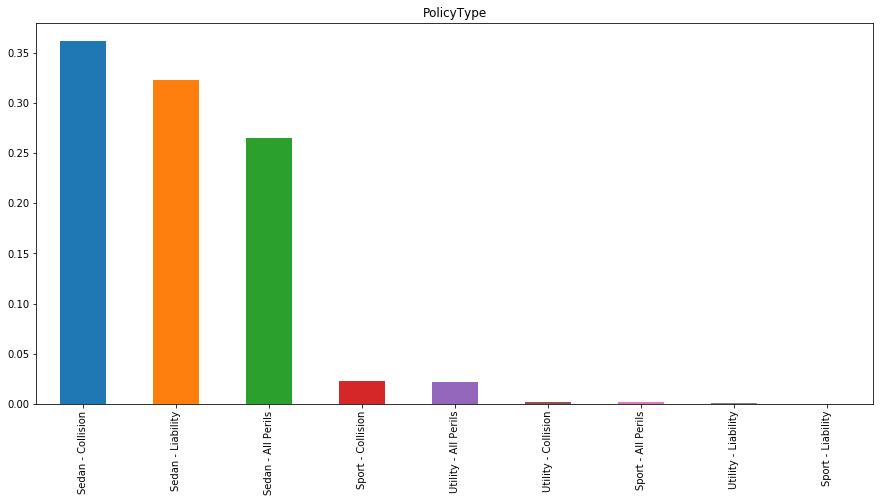

In [11]:
data['PolicyType'].value_counts(normalize=True).plot.bar(figsize=(15,7), title= 'PolicyType')

In [18]:
def reg0(st):
    return re.split("\s\-\s", st)[-1]

In [19]:
def reg1(st):
    return re.split("\s\-\s", st)[0]

In [20]:
data['Policy'] = data['PolicyType'].apply(reg0)

In [21]:
data['Policy'].head()

0    Liability
1    Collision
2    Collision
3    Liability
4    Collision
Name: Policy, dtype: object

In [22]:
data['Policy_car'] =data['PolicyType'].apply(reg1)

In [23]:
data['Policy_car'].head()

0    Sport
1    Sport
2    Sport
3    Sedan
4    Sport
Name: Policy_car, dtype: object

In [24]:
data['Policy'].value_counts(normalize=False)

Collision     4472
Liability     3756
All Perils    3337
Name: Policy, dtype: int64

In [25]:
data['Policy_car'].value_counts(normalize=False)

Sedan      10995
Utility      288
Sport        282
Name: Policy_car, dtype: int64

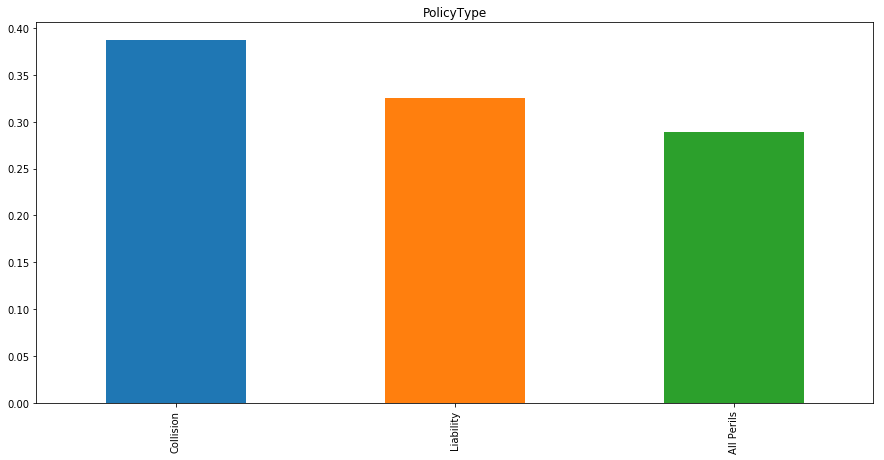

In [26]:
data['Policy'].value_counts(normalize=True).plot.bar(figsize=(15,7), title= 'PolicyType')

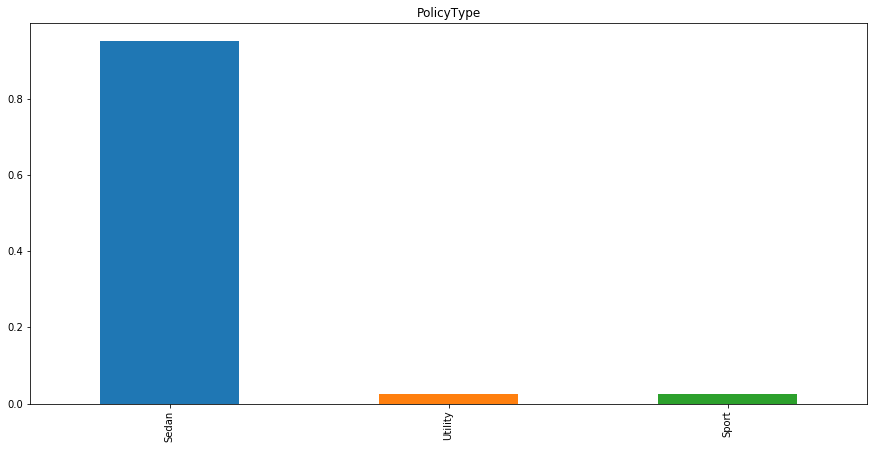

In [27]:
data['Policy_car'].value_counts(normalize=True).plot.bar(figsize=(15,7), title= 'PolicyType')

In [28]:
data['VehicleCategory'].value_counts()

Sedan      7253
Sport      4024
Utility     288
Name: VehicleCategory, dtype: int64

In [35]:
data['Policy_car'].value_counts(normalize=False)

Sedan      10995
Utility      288
Sport        282
Name: Policy_car, dtype: int64

In [32]:
policy_category_notsame=data[data['VehicleCategory'] !=data['Policy_car']]

In [34]:
policy_category_notsame['FraudFound_P'].value_counts(normalize=True)

0    0.992785
1    0.007215
Name: FraudFound_P, dtype: float64

#### no use of matching vehicle category and policy car as it doesn't indicate of fraud (0.007%) 

FraudFound_P,0,1
PolicyType,,
Sedan - All Perils,0.899902,0.100098
Sedan - Collision,0.932871,0.067129
Sedan - Liability,0.992785,0.007215
Sport - All Perils,1.000000,0.000000
Sport - Collision,0.870229,0.129771
Sport - Liability,1.000000,0.000000
Utility - All Perils,0.868526,0.131474
Utility - Collision,0.875000,0.125000
Utility - Liability,1.000000,0.000000


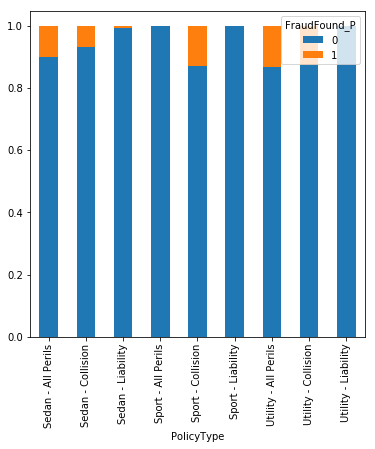

In [38]:
PolicyType=pd.crosstab(data['PolicyType'],data['FraudFound_P'])
PolicyType.div(PolicyType.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

PolicyType.div(PolicyType.sum(1).astype(float), axis=0)

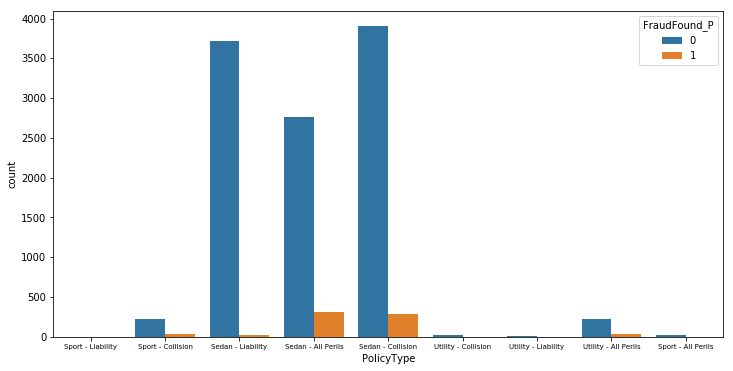

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x='PolicyType', hue='FraudFound_P', data=data)
plt.show()
plt.rcParams["xtick.labelsize"] = 5

FraudFound_P,0,1
Policy,,
All Perils,0.898112,0.101888
Collision,0.928891,0.071109
Liability,0.992812,0.007188


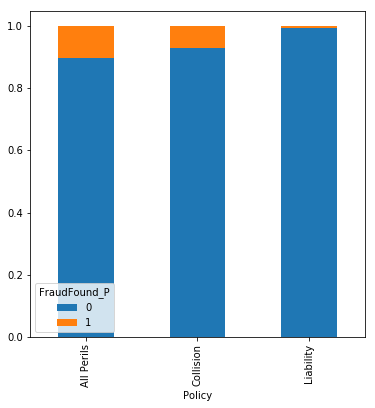

In [39]:
Policy=pd.crosstab(data['Policy'],data['FraudFound_P'])
Policy.div(Policy.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

Policy.div(Policy.sum(1).astype(float), axis=0)

FraudFound_P,0,1
Policy_car,,
Sedan,0.944065,0.055935
Sport,0.879433,0.120567
Utility,0.875000,0.125000


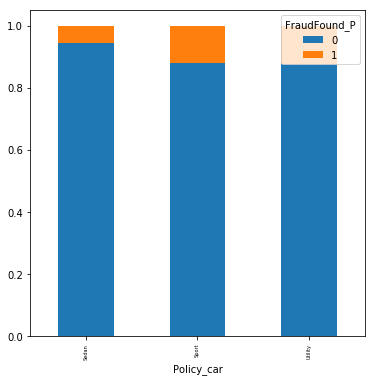

In [44]:
Policy_car=pd.crosstab(data['Policy_car'],data['FraudFound_P'])
Policy_car.div(Policy_car.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

Policy_car.div(Policy_car.sum(1).astype(float), axis=0)

FraudFound_P,0,1
VehicleCategory,,
Sedan,0.918930,0.081070
Sport,0.984841,0.015159
Utility,0.875000,0.125000


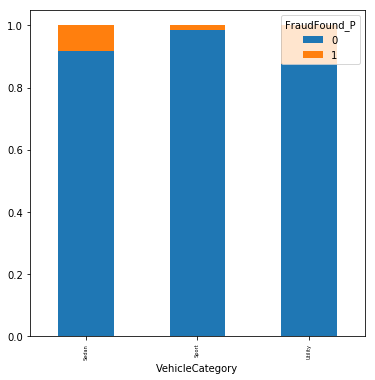

In [47]:
VehiceCategory=pd.crosstab(data['VehicleCategory'],data['FraudFound_P'])
VehiceCategory.div(VehiceCategory.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

VehiceCategory.div(VehiceCategory.sum(1).astype(float), axis=0)

In [51]:

sedan_sedan=data[(data['VehicleCategory'] =='Sedan')& (data['Policy_car']== 'Sedan')]

In [53]:
sedan_sedan.shape

(7253, 36)

In [69]:
sedan_sedan['FraudFound_P'].value_counts(normalize=True)

0    0.91893
1    0.08107
Name: FraudFound_P, dtype: float64

In [59]:
sedan_sport=data[(data['VehicleCategory'] =='Sedan')& (data['Policy_car']== 'Sport')]

In [89]:
sedan_sport.shape
# no sedan is converted to sport in policy

(0, 36)

In [62]:
sedan_utility=data[(data['VehicleCategory'] =='Sedan')& (data['Policy_car']== 'Utility')]

In [88]:
sedan_utility.shape
# no sedan is converted to utility in policy

(0, 36)

In [64]:
sport_sedan=data[(data['VehicleCategory'] =='Sport')& (data['Policy_car']== 'Sedan')]

In [92]:
sport_sedan['FraudFound_P'].value_counts(normalize=False)

0    3715
1      27
Name: FraudFound_P, dtype: int64

In [70]:
sport_sport=data[(data['VehicleCategory'] =='Sport')& (data['Policy_car']== 'Sport')]

In [73]:
sport_sport['FraudFound_P'].value_counts(normalize=True)

0    0.879433
1    0.120567
Name: FraudFound_P, dtype: float64

In [74]:
sport_utility=data[(data['VehicleCategory'] =='Sport')& (data['Policy_car']== 'Utility')]

In [77]:
sport_utility['FraudFound_P'].value_counts(normalize=True)
# no sport is said as utility in policy

Series([], Name: FraudFound_P, dtype: float64)

In [78]:
utility_utility=data[(data['VehicleCategory'] =='Utility')& (data['Policy_car']== 'Utility')]

In [81]:
utility_utility['FraudFound_P'].value_counts(normalize=False)

0    252
1     36
Name: FraudFound_P, dtype: int64

In [82]:
utility_sedan=data[(data['VehicleCategory'] =='Utility')& (data['Policy_car']== 'Sedan')]

In [84]:
utility_sedan['FraudFound_P'].value_counts(normalize=False)
# no utility is converted to sedan in policy

Series([], Name: FraudFound_P, dtype: int64)

In [85]:
utility_sport=data[(data['VehicleCategory'] =='Utility')& (data['Policy_car']== 'Sport')]

In [87]:
utility_sport['FraudFound_P'].value_counts(normalize=False)
# no utility is converted to sport in policy

Series([], Name: FraudFound_P, dtype: int64)

In [90]:
data['VehicleCategory'].value_counts()

Sedan      7253
Sport      4024
Utility     288
Name: VehicleCategory, dtype: int64

In [91]:
data['Policy_car'].value_counts()

Sedan      10995
Utility      288
Sport        282
Name: Policy_car, dtype: int64

#### new feature can be generated regarding the sport car called as sedan in policy , these are almost of non fraud case

In [95]:
data['category_policy_vehiclechange']= 0
data.loc[(data['VehicleCategory'] == 'Sport') & (data['Policy_car']== 'Sedan') , 'category_policy_vehiclechange'] = 1

In [96]:
data['category_policy_vehiclechange'].value_counts()

0    7823
1    3742
Name: category_policy_vehiclechange, dtype: int64

FraudFound_P,0,1
category_policy_vehiclechange,,
0,0.915889,0.084111
1,0.992785,0.007215


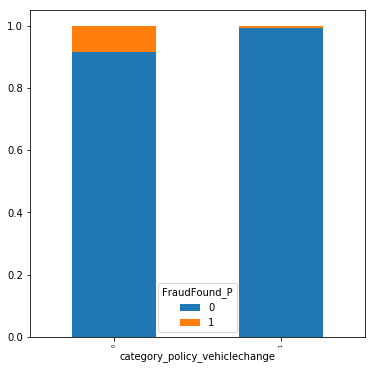

In [103]:
category_policy_vehiclechange=pd.crosstab(data['category_policy_vehiclechange'],data['FraudFound_P'])
category_policy_vehiclechange.div(category_policy_vehiclechange.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

category_policy_vehiclechange.div(category_policy_vehiclechange.sum(1).astype(float), axis=0)

In [97]:
data.shape

(11565, 38)

In [98]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize', 'Policy', 'Policy_car',
       'category_policy_vehiclechange', 'Make_category'],
      dtype='object')

In [99]:
data.drop('Make_category', axis=1, inplace=True)

In [100]:
data.shape

(11565, 37)

In [101]:
# test changes
test['Policy'] = data['PolicyType'].apply(reg0)
test['Policy_car'] = data['PolicyType'].apply(reg1)
test['category_policy_vehiclechange']= 0
test.loc[(test['VehicleCategory'] == 'Sport') & (test['Policy_car']== 'Sedan') , 'category_policy_vehiclechange'] = 1


In [102]:
test.shape

(3855, 37)

#### Deductible variable

In [104]:
data['Deductible'].value_counts()

400    11128
700      226
500      207
300        4
Name: Deductible, dtype: int64

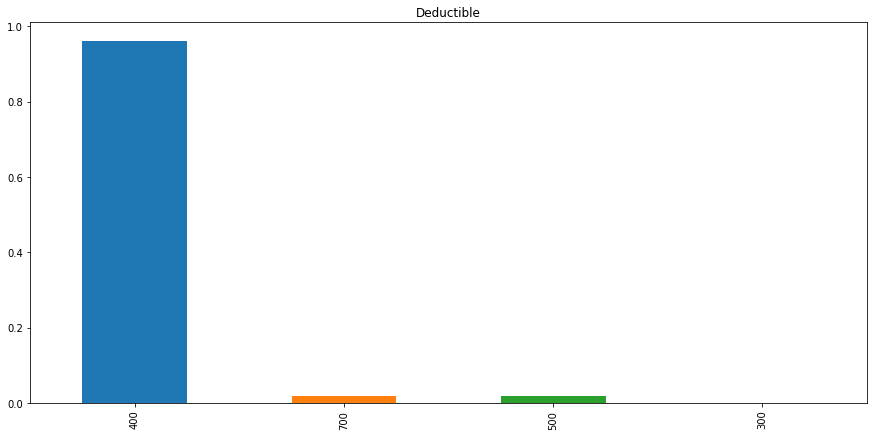

In [108]:
data['Deductible'].value_counts(normalize=True).plot.bar(figsize=(15,7), title= 'Deductible')
plt.rcParams["xtick.labelsize"] = 20

FraudFound_P,0,1
Deductible,,
300,0.750000,0.250000
400,0.943476,0.056524
500,0.821256,0.178744
700,0.920354,0.079646


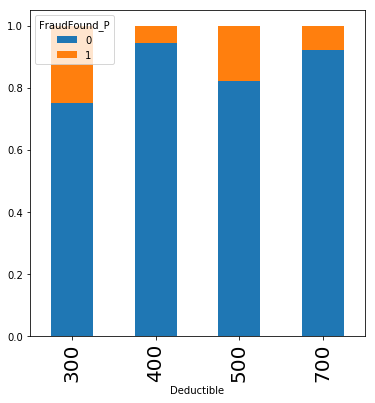

In [109]:
Deductible=pd.crosstab(data['Deductible'],data['FraudFound_P'])
Deductible.div(Deductible.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

Deductible.div(Deductible.sum(1).astype(float), axis=0)

In [110]:
# creating new feature , deductible_400
data['Deductible_400']= 0

In [113]:
data.loc[(data['Deductible'] == 400) , 'Deductible_400'] = 1


In [114]:
data['Deductible_400'].value_counts()

1    11128
0      437
Name: Deductible_400, dtype: int64

FraudFound_P,0,1
Deductible_400,,
0,0.871854,0.128146
1,0.943476,0.056524


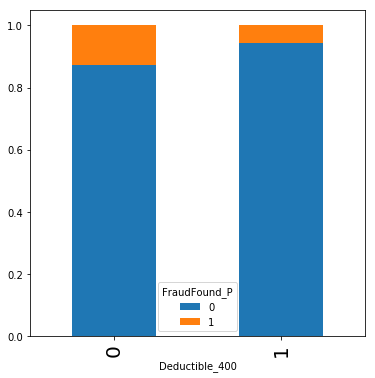

In [115]:
Deductible_400=pd.crosstab(data['Deductible_400'],data['FraudFound_P'])
Deductible_400.div(Deductible_400.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

Deductible_400.div(Deductible_400.sum(1).astype(float), axis=0)

can give improvement , need to use different algos and see

In [116]:
#for test data as well
test['Deductible_400']= 0
test.loc[(test['Deductible'] == 400) , 'Deductible_400'] = 1

#### Agent type variable 

In [118]:
data['AgentType'].value_counts()

External    11394
Internal      171
Name: AgentType, dtype: int64

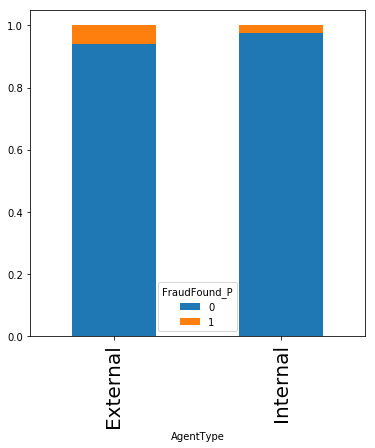

In [126]:
Agent=pd.crosstab(data['AgentType'],data['FraudFound_P'])
Agent.div(Agent.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [122]:
Agent.div(Agent.sum(1).astype(float), axis=0)

FraudFound_P,0,1
AgentType,,
External,0.940232,0.059768
Internal,0.976608,0.023392


External are more prone to frauds

#### base policy variable


In [128]:
data['BasePolicy'].value_counts()

Collision     4472
Liability     3756
All Perils    3337
Name: BasePolicy, dtype: int64

In [129]:
data["Policy"].value_counts()

Collision     4472
Liability     3756
All Perils    3337
Name: Policy, dtype: int64

base policy variable is same as my created feature policy from policyType
therfore no use

### Claim Data 

Variables
1. accident area
2. fault
3. days policy accident
4. days policy claim
5. past no. of claims
4. police report filed
5. witness present
6. claim size
7. no. of supliments

#### Accident area variable 

In [130]:
data['AccidentArea'].value_counts()

Urban    10356
Rural     1209
Name: AccidentArea, dtype: int64

FraudFound_P,0,1
AccidentArea,,
Rural,0.918941,0.081059
Urban,0.943318,0.056682


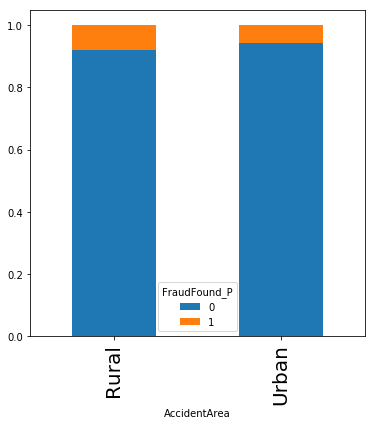

In [132]:
AccidentArea=pd.crosstab(data['AccidentArea'],data['FraudFound_P'])
AccidentArea.div(AccidentArea.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

AccidentArea.div(AccidentArea.sum(1).astype(float), axis=0)

accident area can be used as a feature 

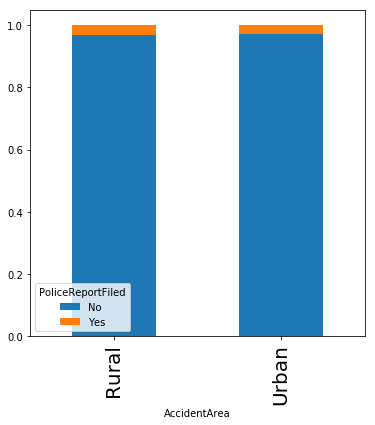

In [161]:
a=pd.crosstab(data['AccidentArea'],data['PoliceReportFiled'])
a.div(a.sum(1).astype(float), axis=0)
a.div(a.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

In [167]:
data['area_report']= 'Rural_no'

In [168]:
data.loc[(data['AccidentArea'] == 'Rural') & (data['PoliceReportFiled']== 'Yes') , 'area_report'] = 'Rural_yes'
data.loc[(data['AccidentArea'] == 'Urban') & (data['PoliceReportFiled']== 'No') , 'area_report'] = 'Urban_no'
data.loc[(data['AccidentArea'] == 'Urban') & (data['PoliceReportFiled']== 'Yes') , 'area_report'] = 'Urban_yes'


In [169]:
data['area_report'].value_counts()

Urban_no     10063
Rural_no      1172
Urban_yes      293
Rural_yes       37
Name: area_report, dtype: int64

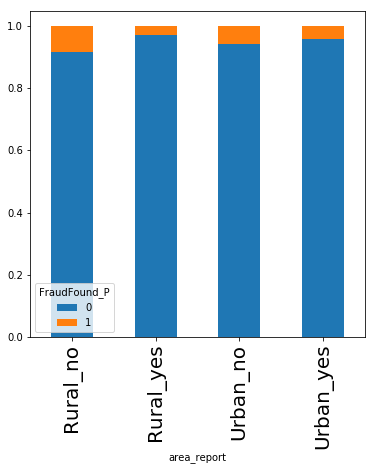

In [176]:
area_report=pd.crosstab(data['area_report'],data['FraudFound_P'])

area_report.div(area_report.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [178]:
area_report.div(area_report.sum(1).astype(float), axis=0)

FraudFound_P,0,1
area_report,,
Rural_no,0.917235,0.082765
Rural_yes,0.972973,0.027027
Urban_no,0.942860,0.057140
Urban_yes,0.959044,0.040956


new feature : accident area and policeReport combined : fraud rate 
Rural_no > Urban_no > Urban_yes > Rural_yes

In [179]:
# for test data
test['area_report']= 'Rural_no'
test.loc[(test['AccidentArea'] == 'Rural') & (test['PoliceReportFiled']== 'Yes') , 'area_report'] = 'Rural_yes'
test.loc[(test['AccidentArea'] == 'Urban') & (test['PoliceReportFiled']== 'No') , 'area_report'] = 'Urban_no'
test.loc[(test['AccidentArea'] == 'Urban') & (test['PoliceReportFiled']== 'Yes') , 'area_report'] = 'Urban_yes'



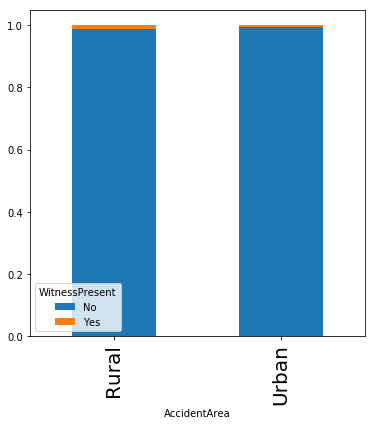

In [170]:
b=pd.crosstab(data['AccidentArea'],data['WitnessPresent'])
b.div(b.sum(1).astype(float), axis=0)
b.div(b.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

In [171]:
b.div(b.sum(1).astype(float), axis=0)


WitnessPresent,No,Yes
AccidentArea,,
Rural,0.986766,0.013234
Urban,0.994979,0.005021


In [172]:
data['area_witness']= 'Rural_no'

In [173]:
data.loc[(data['AccidentArea'] == 'Rural') & (data['WitnessPresent']== 'Yes') , 'area_witness'] = 'Rural_yes'
data.loc[(data['AccidentArea'] == 'Urban') & (data['WitnessPresent']== 'No') , 'area_witness'] = 'Urban_no'
data.loc[(data['AccidentArea'] == 'Urban') & (data['WitnessPresent']== 'Yes') , 'area_witness'] = 'Urban_yes'


In [174]:
data['area_witness'].value_counts()

Urban_no     10304
Rural_no      1193
Urban_yes       52
Rural_yes       16
Name: area_witness, dtype: int64

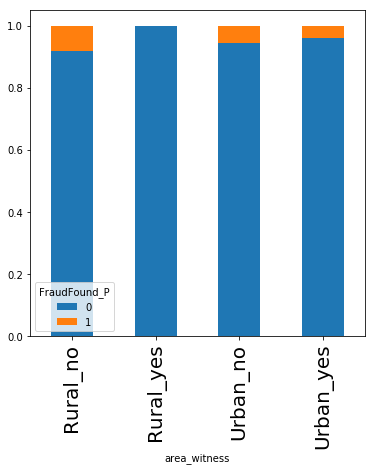

In [175]:
area_witness=pd.crosstab(data['area_witness'],data['FraudFound_P'])

area_witness.div(area_witness.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [159]:
area_witness.div(area_witness.sum(1).astype(float), axis=0)

FraudFound_P,0,1
area_witness,,
Rural_no,0.917854,0.082146
Rural_yes,1.000000,0.000000
Urban_no,0.943226,0.056774
Urban_yes,0.961538,0.038462


In [180]:
#for test data
test['area_witness']= 'Rural_no'
test.loc[(test['AccidentArea'] == 'Rural') & (test['WitnessPresent']== 'Yes') , 'area_witness'] = 'Rural_yes'
test.loc[(test['AccidentArea'] == 'Urban') & (test['WitnessPresent']== 'No') , 'area_witness'] = 'Urban_no'
test.loc[(test['AccidentArea'] == 'Urban') & (test['WitnessPresent']== 'Yes') , 'area_witness'] = 'Urban_yes'


Findings : a new feature area_witness based on accident area and witness present , gives rate of fraud :
Rural no > Urban no > Urban Yes > Rural yes


In [182]:
data.shape

(11565, 40)

In [183]:
test.shape

(3855, 40)

#### Past no. of claims   and no. of suppliment variable

In [184]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize', 'Policy', 'Policy_car',
       'category_policy_vehiclechange', 'Deductible_400', 'area_witness',
       'area_report'],
      dtype='object')

In [185]:
data['PastNumberOfClaims'].value_counts()

2 to 4         4140
none           3286
1              2675
more than 4    1464
Name: PastNumberOfClaims, dtype: int64

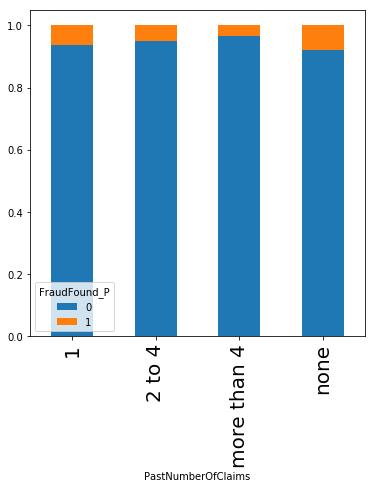

In [186]:
PastNumberOfClaims=pd.crosstab(data['PastNumberOfClaims'],data['FraudFound_P'])

PastNumberOfClaims.div(PastNumberOfClaims.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

In [247]:
PastNumberOfClaims.div(PastNumberOfClaims.sum(1).astype(float),axis=0)

FraudFound_P,0,1
PastNumberOfClaims,,
1,0.938318,0.061682
2 to 4,0.949517,0.050483
more than 4,0.964481,0.035519
none,0.921181,0.078819


trend : fraud rate : none > 1> 2 to 4 > more than 4

In [213]:
data['Claims']= 'till1'
data.loc[(data['PastNumberOfClaims'] == '2 to 4')  , 'Claims'] = '>1'
data.loc[(data['PastNumberOfClaims'] == 'more than 4')  , 'Claims'] = '>1'

In [214]:
data['Claims'].value_counts()

till1    5961
>1       5604
Name: Claims, dtype: int64

In [215]:
claims=pd.crosstab(data['Claims'],data['FraudFound_P'])

claims.div(claims.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Claims,,
>1,0.953426,0.046574
till1,0.928871,0.071129


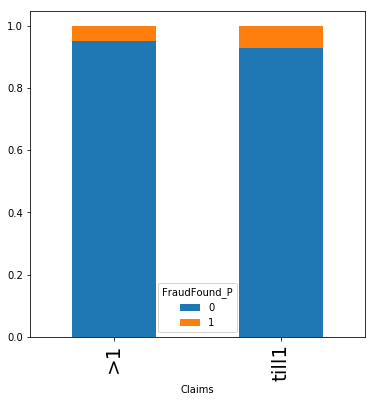

In [246]:
claims.div(claims.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

In [216]:
data['NumberOfSuppliments'].value_counts()

none           5330
more than 5    2875
1 to 2         1846
3 to 5         1514
Name: NumberOfSuppliments, dtype: int64

In [217]:
NumberOfSuppliments=pd.crosstab(data['NumberOfSuppliments'],data['FraudFound_P'])

NumberOfSuppliments.div(NumberOfSuppliments.sum(1).astype(float),axis=0)

FraudFound_P,0,1
NumberOfSuppliments,,
1 to 2,0.938787,0.061213
3 to 5,0.951783,0.048217
more than 5,0.950609,0.049391
none,0.933021,0.066979


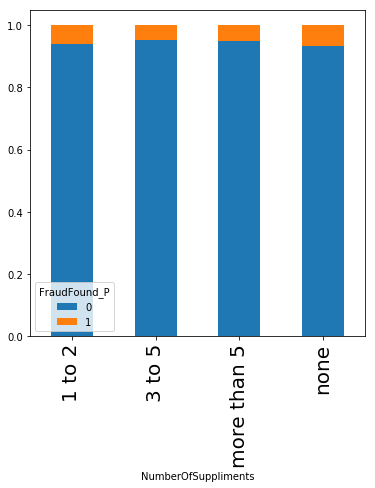

In [244]:
NumberOfSuppliments.div(NumberOfSuppliments.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

no clear trend

In [218]:
data['Suppliments']= 'till2'
data.loc[(data['NumberOfSuppliments'] == '3 to 5')  , 'Suppliments'] = '>2'
data.loc[(data['NumberOfSuppliments'] == 'more than 5')  , 'Suppliments'] = '>2'

In [220]:
data['Suppliments'].value_counts()

till2    7176
>2       4389
Name: Suppliments, dtype: int64

In [222]:
suppliments=pd.crosstab(data['Suppliments'],data['FraudFound_P'])

suppliments.div(suppliments.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Suppliments,,
>2,0.951014,0.048986
till2,0.934504,0.065496


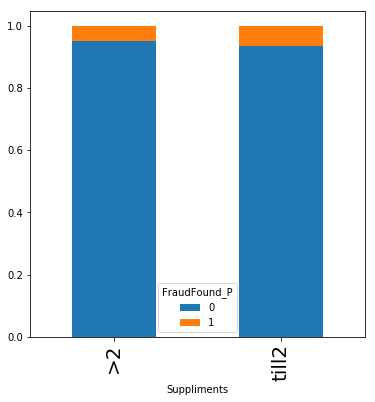

In [245]:
suppliments.div(suppliments.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

In [223]:
data['Claim_Suppliments']= 'till1_till2'
data.loc[(data['Claims'] == 'till1') & (data['Suppliments']== '>2') , 'Claim_Suppliments'] = 'till1_>2'
data.loc[(data['Claims'] == '>1') & (data['Suppliments']== 'till2') , 'Claim_Suppliments'] = '>1_till2'
data.loc[(data['Claims'] == '>1') & (data['Suppliments']== '>2') , 'Claim_Suppliments'] = '>1_>2'

In [225]:
data['Claim_Suppliments'].value_counts()

till1_till2    3945
>1_till2       3231
>1_>2          2373
till1_>2       2016
Name: Claim_Suppliments, dtype: int64

In [226]:
Claim_Suppliments=pd.crosstab(data['Claim_Suppliments'],data['FraudFound_P'])

Claim_Suppliments.div(Claim_Suppliments.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Claim_Suppliments,,
>1_>2,0.956595,0.043405
>1_till2,0.951099,0.048901
till1_>2,0.944444,0.055556
till1_till2,0.920913,0.079087


In [233]:
data.drop('Claim_Suppliments', axis=1, inplace=True)

In [229]:
data['claim_none_suppliment_none']=0
data.loc[(data['PastNumberOfClaims'] == 'none') & (data['NumberOfSuppliments']== 'none') , 'claim_none_suppliment_none'] = 1


In [230]:
data['claim_none_suppliment_none'].value_counts()

0    9789
1    1776
Name: claim_none_suppliment_none, dtype: int64

In [231]:
claim_none_suppliment_none=pd.crosstab(data['claim_none_suppliment_none'],data['FraudFound_P'])

claim_none_suppliment_none.div(claim_none_suppliment_none.sum(1).astype(float),axis=0)

FraudFound_P,0,1
claim_none_suppliment_none,,
0,0.947186,0.052814
1,0.905405,0.094595


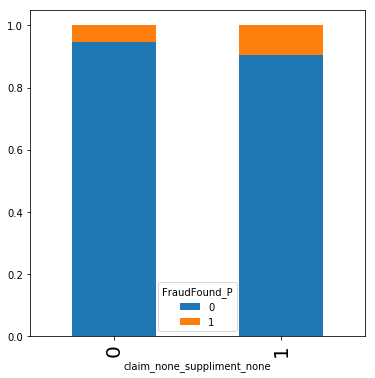

In [232]:
claim_none_suppliment_none.div(claim_none_suppliment_none.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

new feature , when claims and suppliments are none for both .

In [194]:
data['claims_supliments']= 'none_none'
data.loc[(data['PastNumberOfClaims'] == 'none') & (data['NumberOfSuppliments']== '1 to 2') , 'claims_supliments'] = 'none_1-2'
data.loc[(data['PastNumberOfClaims'] == 'none') & (data['NumberOfSuppliments']== '3 to 5') , 'claims_supliments'] = 'none_3-5'
data.loc[(data['PastNumberOfClaims'] == 'none') & (data['NumberOfSuppliments']== 'more than 5') , 'claims_supliments'] = 'none_more5'
data.loc[(data['PastNumberOfClaims'] == 1) & (data['NumberOfSuppliments']== '1 to 2') , 'claims_supliments'] = '1_1-2'
data.loc[(data['PastNumberOfClaims'] == 1) & (data['NumberOfSuppliments']== '3 to 5') , 'claims_supliments'] = '1_3-5'
data.loc[(data['PastNumberOfClaims'] == 1) & (data['NumberOfSuppliments']== 'more than 5') , 'claims_supliments'] = '1_more5'
data.loc[(data['PastNumberOfClaims'] == '2 to 4') & (data['NumberOfSuppliments']== '1 to 2') , 'claims_supliments'] = '2t4_1-2'
data.loc[(data['PastNumberOfClaims'] == '2 to 4') & (data['NumberOfSuppliments']== '3 to 5') , 'claims_supliments'] = '2t4_3-5'
data.loc[(data['PastNumberOfClaims'] == '2 to 4') & (data['NumberOfSuppliments']== 'more than 5') , 'claims_supliments'] = '2t4_more5'
data.loc[(data['PastNumberOfClaims'] == 'more than 4') & (data['NumberOfSuppliments']== '1 to 2') , 'claims_supliments'] = '>4_1-2'
data.loc[(data['PastNumberOfClaims'] == 'more than 4') & (data['NumberOfSuppliments']== '3 to 5') , 'claims_supliments'] = '>4_3-5'
data.loc[(data['PastNumberOfClaims'] == 'more than 4') & (data['NumberOfSuppliments']== 'more than 5') , 'claims_supliments'] = '>4_more5'
data.loc[(data['PastNumberOfClaims'] == 1) & (data['NumberOfSuppliments']== 'none') , 'claims_supliments'] = '1_none'
data.loc[(data['PastNumberOfClaims'] == '2 to 4') & (data['NumberOfSuppliments']== 'none') , 'claims_supliments'] = '2t4_none'
data.loc[(data['PastNumberOfClaims'] == 'more than 4') & (data['NumberOfSuppliments']== 'none') , 'claims_supliments'] = '>4_none'



In [195]:
data['claims_supliments'].value_counts()

none_none     1776
2t4_none      1743
1_none        1260
2t4_more5     1104
2t4_1-2        705
1_more5        663
none_more5     634
2t4_3-5        588
>4_none        551
none_1-2       496
>4_more5       474
1_1-2          413
none_3-5       380
1_3-5          339
>4_1-2         232
>4_3-5         207
Name: claims_supliments, dtype: int64

In [196]:
claims_supliments=pd.crosstab(data['claims_supliments'],data['FraudFound_P'])

claims_supliments.div(claims_supliments.sum(1).astype(float),axis=0)

FraudFound_P,0,1
claims_supliments,,
1_1-2,0.927361,0.072639
1_3-5,0.958702,0.041298
1_more5,0.941176,0.058824
1_none,0.934921,0.065079
2t4_1-2,0.936170,0.063830
2t4_3-5,0.952381,0.047619
2t4_more5,0.958333,0.041667
2t4_none,0.948365,0.051635
>4_1-2,0.974138,0.025862


In [206]:
data.drop('claims_supliments', axis=1, inplace=True)

In [239]:
data.shape

(11565, 45)

In [238]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize', 'Policy', 'Policy_car',
       'category_policy_vehiclechange', 'Deductible_400', 'area_witness',
       'area_report', 'Claims', 'Supliments', 'Claim_Supliments',
       'Suppliments', 'claim_none_suppliment_none'],
      dtype='object')

In [240]:
data.drop('Claim_Supliments', axis=1, inplace=True)
data.drop('Supliments', axis=1, inplace=True)


In [241]:
data.shape

(11565, 43)

In [242]:
# for test data
test['claim_none_suppliment_none']=0
test.loc[(test['PastNumberOfClaims'] == 'none') & (test['NumberOfSuppliments']== 'none') , 'claim_none_suppliment_none'] = 1
test['Suppliments']= 'till2'
test.loc[(test['NumberOfSuppliments'] == '3 to 5')  , 'Suppliments'] = '>2'
test.loc[(test['NumberOfSuppliments'] == 'more than 5')  , 'Suppliments'] = '>2'
test['Claims']= 'till1'
test.loc[(test['PastNumberOfClaims'] == '2 to 4')  , 'Claims'] = '>1'
test.loc[(test['PastNumberOfClaims'] == 'more than 4')  , 'Claims'] = '>1'


In [243]:
test.shape

(3855, 43)

need to use one of PastNoOfClaims or Claims and Suppliments or Number of Suppliments , as correlated

#### policeReportFiled and Witness Presend variables 

In [248]:
data['PoliceReportFiled'].value_counts()

No     11235
Yes      330
Name: PoliceReportFiled, dtype: int64

In [249]:
data['WitnessPresent'].value_counts()

No     11497
Yes       68
Name: WitnessPresent, dtype: int64

In [250]:
PoliceReportFiled=pd.crosstab(data['PoliceReportFiled'],data['FraudFound_P'])

PoliceReportFiled.div(PoliceReportFiled.sum(1).astype(float),axis=0)

FraudFound_P,0,1
PoliceReportFiled,,
No,0.940187,0.059813
Yes,0.960606,0.039394


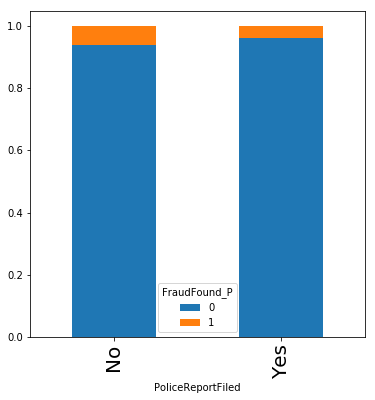

In [251]:
PoliceReportFiled.div(PoliceReportFiled.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

fraud rate : more if no police report filed

In [252]:
WitnessPresent=pd.crosstab(data['WitnessPresent'],data['FraudFound_P'])

WitnessPresent.div(WitnessPresent.sum(1).astype(float),axis=0)

FraudFound_P,0,1
WitnessPresent,,
No,0.940593,0.059407
Yes,0.970588,0.029412


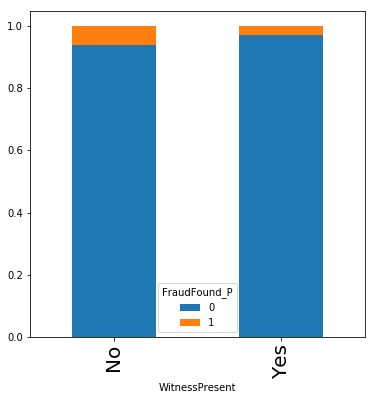

In [253]:
WitnessPresent.div(WitnessPresent.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

more fraud rate if no witness present 

In [257]:
data['PoliceReport_Witness']= '1_1'
data.loc[(data['PoliceReportFiled'] == 'Yes') & (data['WitnessPresent']== 'No') , 'PoliceReport_Witness'] = '1_0'
data.loc[(data['PoliceReportFiled'] == 'No') & (data['WitnessPresent']== 'Yes') , 'PoliceReport_Witness'] = '0_1'
data.loc[(data['PoliceReportFiled'] == 'No') & (data['WitnessPresent']== 'No') , 'PoliceReport_Witness'] = '0_0'

In [258]:
data['PoliceReport_Witness'].value_counts()

0_0    11193
1_0      304
0_1       42
1_1       26
Name: PoliceReport_Witness, dtype: int64

In [260]:
PoliceReport_Witness=pd.crosstab(data['PoliceReport_Witness'],data['FraudFound_P'])

PoliceReport_Witness.div(PoliceReport_Witness.sum(1).astype(float),axis=0)

FraudFound_P,0,1
PoliceReport_Witness,,
0_0,0.940141,0.059859
0_1,0.952381,0.047619
1_0,0.957237,0.042763
1_1,1.000000,0.000000


In [261]:
data['PoliceReport_WitnessPresent']=0
data.loc[(data['PoliceReportFiled'] == 'Yes') & (data['WitnessPresent']== 'Yes') , 'PoliceReport_WitnessPresent'] = 1


In [262]:
data['PoliceReport_WitnessPresent'].value_counts()

0    11539
1       26
Name: PoliceReport_WitnessPresent, dtype: int64

In [263]:
PoliceReport_WitnessPresent=pd.crosstab(data['PoliceReport_WitnessPresent'],data['FraudFound_P'])

PoliceReport_WitnessPresent.div(PoliceReport_WitnessPresent.sum(1).astype(float),axis=0)

FraudFound_P,0,1
PoliceReport_WitnessPresent,,
0,0.940636,0.059364
1,1.000000,0.000000


new feature where police report and witness is both positve rest 0

In [264]:
data.drop('PoliceReport_Witness', axis=1, inplace=True)



In [266]:
data.shape

(11565, 44)

In [267]:
#for test data
test['PoliceReport_WitnessPresent']=0
test.loc[(test['PoliceReportFiled'] == 'Yes') & (test['WitnessPresent']== 'Yes') , 'PoliceReport_WitnessPresent'] = 1



In [268]:
test.shape

(3855, 44)

In [269]:
test.shape

(3855, 44)

#### Fault variable

In [270]:
data['Fault'].value_counts()

Policy Holder    8394
Third Party      3171
Name: Fault, dtype: int64

In [271]:
Fault=pd.crosstab(data['Fault'],data['FraudFound_P'])

Fault.div(Fault.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Fault,,
Policy Holder,0.92173,0.07827
Third Party,0.99117,0.00883


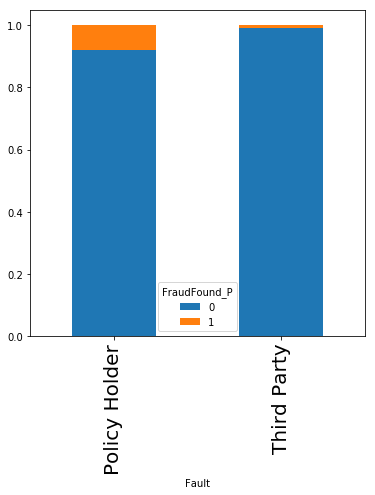

In [272]:
Fault.div(Fault.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

policy holder fraud rate is more than 3rd party

#### claim size variable 

C:\Users\1180s\Documents\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


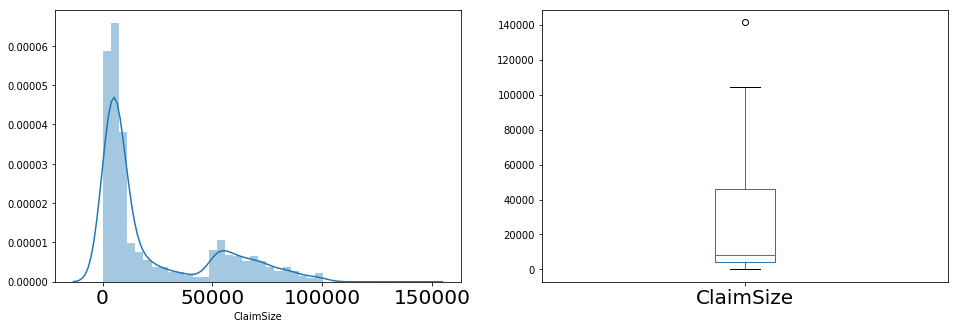

In [273]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['ClaimSize']);

plt.subplot(122)
data['ClaimSize'].plot.box(figsize=(16,5))

plt.show()

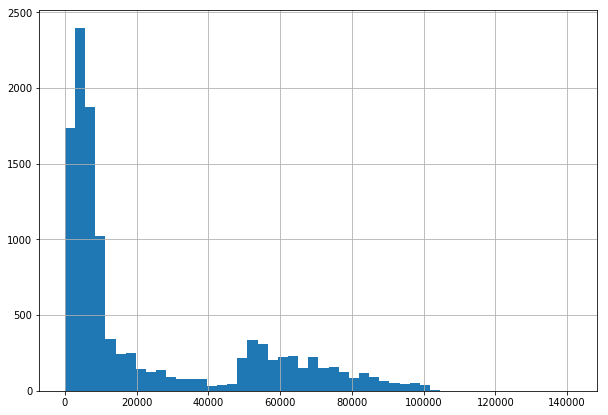

In [287]:
data['ClaimSize'].hist(bins=50,figsize=(10, 7))
plt.rcParams["xtick.labelsize"] = 15

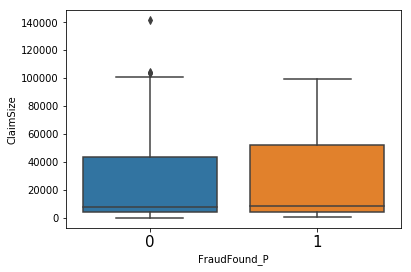

In [290]:
sns.boxplot(x='FraudFound_P', y='ClaimSize', data=data)

C:\Users\1180s\Documents\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


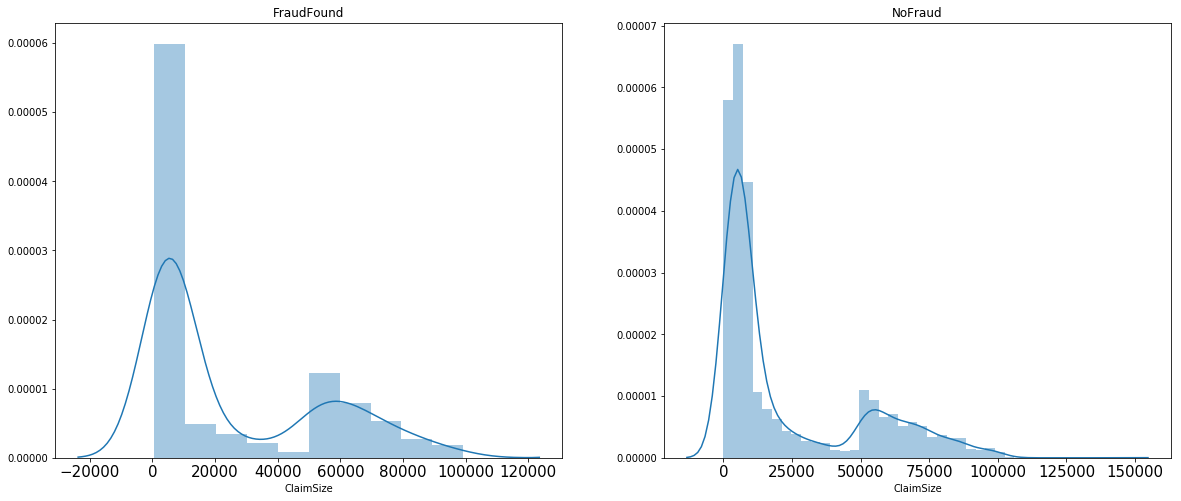

In [294]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(data[data['FraudFound_P']==1].ClaimSize,ax=ax[0])
ax[0].set_title('FraudFound')
sns.distplot(data[data['FraudFound_P']==0].ClaimSize,ax=ax[1])
ax[1].set_title('NoFraud')
#sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
#ax[2].set_title('Fares in Pclass 3')
plt.show()

In [297]:
data[data["ClaimSize"]==0]['FraudFound_P']

94      0
130     0
4330    0
5984    0
7994    0
9058    0
Name: FraudFound_P, dtype: int64

In [299]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [396]:
cut_points = [13000,20000,50000,98000]
labels = ['very low',"low","medium","high","very high"]
data["ClaimSize_bin"] = binning(data["ClaimSize"], cut_points, labels)
#print pd.value_counts(data["LoanAmount_Bin"], sort=False)

In [397]:
data['ClaimSize_bin'].value_counts()

very low     7242
high         2764
medium        851
low           625
very high      83
Name: ClaimSize_bin, dtype: int64

In [398]:
ClaimSize_bin=pd.crosstab(data['ClaimSize_bin'],data['FraudFound_P'])

ClaimSize_bin.div(ClaimSize_bin.sum(1).astype(float),axis=0)

FraudFound_P,0,1
ClaimSize_bin,,
very low,0.942143,0.057857
low,0.971200,0.028800
medium,0.948296,0.051704
high,0.927641,0.072359
very high,0.951807,0.048193


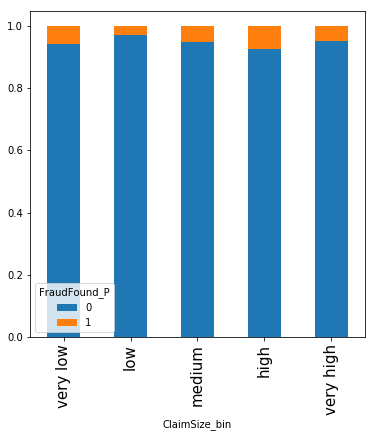

In [399]:
ClaimSize_bin.div(ClaimSize_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

Binning of claim size variable as a feature

In [401]:
#for test data
cut_points = [13000,20000,50000,98000]
labels = ['very low',"low","medium","high","very high"]
test["ClaimSize_bin"] = binning(test["ClaimSize"], cut_points, labels)


use one of claim_size binning or claimsize

In [403]:
test.shape , data.shape

((3855, 45), (11565, 45))

### personal policy holder variables

variables
1. sex 
2. martial status
3. age
4. age of policy holder
5. address change claim
6. no. of cars
7. driver rating

#### sex , martial status, age and age of policy holder feature 

In [404]:
data["Sex"].value_counts()

Male      9768
Female    1797
Name: Sex, dtype: int64

In [406]:
Sex=pd.crosstab(data['Sex'],data['FraudFound_P'])

Sex.div(Sex.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Sex,,
Female,0.959377,0.040623
Male,0.937346,0.062654


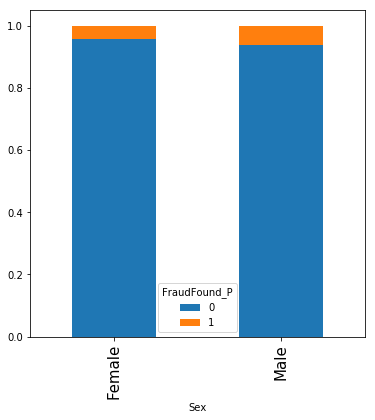

In [407]:
Sex.div(Sex.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

more fraud done by male , slightly

In [410]:
data["MaritalStatus"].value_counts()

Married     7986
Single      3497
Divorced      61
Widow         21
Name: MaritalStatus, dtype: int64

In [412]:
MaritalStatus=pd.crosstab(data['MaritalStatus'],data['FraudFound_P'])

MaritalStatus.div(MaritalStatus.sum(1).astype(float),axis=0)

FraudFound_P,0,1
MaritalStatus,,
Divorced,0.950820,0.049180
Married,0.939644,0.060356
Single,0.943380,0.056620
Widow,0.904762,0.095238


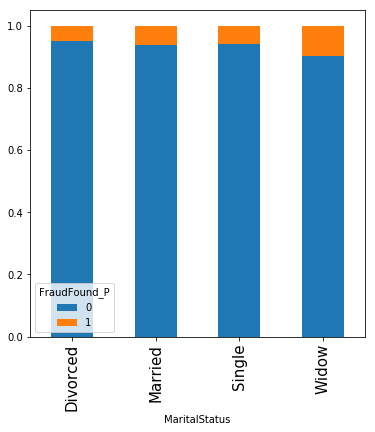

In [413]:
MaritalStatus.div(MaritalStatus.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

feature is not so convincing , so need to do something

In [414]:
data['Sex_marital']= 'Male_Married'
data.loc[(data['Sex'] == 'Male') & (data['MaritalStatus']== 'Single') , 'Sex_marital'] = 'Male_Single'
data.loc[(data['Sex'] == 'Male') & (data['MaritalStatus']== 'Divorced') , 'Sex_marital'] = 'Male_Divorced'
data.loc[(data['Sex'] == 'Male') & (data['MaritalStatus']== 'Widow') , 'Sex_marital'] = 'Male_Widow'
data.loc[(data['Sex'] == 'Female') & (data['MaritalStatus']== 'Single') , 'Sex_marital'] = 'Female_Single'
data.loc[(data['Sex'] == 'Female') & (data['MaritalStatus']== 'Divorced') , 'Sex_marital'] = 'Female_Divorced'
data.loc[(data['Sex'] == 'Female') & (data['MaritalStatus']== 'Widow') , 'Sex_marital'] = 'Female_Widow'
data.loc[(data['Sex'] == 'Female') & (data['MaritalStatus']== 'Married') , 'Sex_marital'] = 'Female_Married'




In [415]:
data['Sex_marital'].value_counts()

Male_Married       7011
Male_Single        2723
Female_Married      975
Female_Single       774
Female_Divorced      34
Male_Divorced        27
Female_Widow         14
Male_Widow            7
Name: Sex_marital, dtype: int64

In [416]:
Sex_marital=pd.crosstab(data['Sex_marital'],data['FraudFound_P'])

Sex_marital.div(Sex_marital.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Sex_marital,,
Female_Divorced,0.970588,0.029412
Female_Married,0.953846,0.046154
Female_Single,0.966408,0.033592
Female_Widow,0.928571,0.071429
Male_Divorced,0.925926,0.074074
Male_Married,0.937669,0.062331
Male_Single,0.936834,0.063166
Male_Widow,0.857143,0.142857


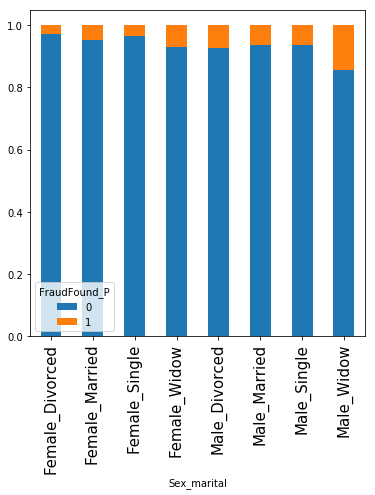

In [700]:
Sex_marital.div(Sex_marital.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

not much usefulness in this , but keep the feature and can later delete at a later stage .

In [701]:
#for test data
test['Sex_marital']= 'Male_Married'
test.loc[(test['Sex'] == 'Male') & (test['MaritalStatus']== 'Single') , 'Sex_marital'] = 'Male_Single'
test.loc[(test['Sex'] == 'Male') & (test['MaritalStatus']== 'Divorced') , 'Sex_marital'] = 'Male_Divorced'
test.loc[(test['Sex'] == 'Male') & (test['MaritalStatus']== 'Widow') , 'Sex_marital'] = 'Male_Widow'
test.loc[(test['Sex'] == 'Female') & (test['MaritalStatus']== 'Single') , 'Sex_marital'] = 'Female_Single'
test.loc[(test['Sex'] == 'Female') & (test['MaritalStatus']== 'Divorced') , 'Sex_marital'] = 'Female_Divorced'
test.loc[(test['Sex'] == 'Female') & (test['MaritalStatus']== 'Widow') , 'Sex_marital'] = 'Female_Widow'
test.loc[(test['Sex'] == 'Female') & (test['MaritalStatus']== 'Married') , 'Sex_marital'] = 'Female_Married'




In [409]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize', 'Policy', 'Policy_car',
       'category_policy_vehiclechange', 'Deductible_400', 'area_witness',
       'area_report', 'Claims', 'Suppliments', 'claim_none_suppliment_none',
       'PoliceReport_WitnessPresent', 'ClaimSize_bin'],
      dtype='object')

#### address , no. of cars , driver rating 

In [417]:
data['AddressChange_Claim'].value_counts()

no change         10715
4 to 8 years        496
2 to 3 years        222
1 year              128
under 6 months        4
Name: AddressChange_Claim, dtype: int64

In [418]:
AddressChange_Claim=pd.crosstab(data['AddressChange_Claim'],data['FraudFound_P'])

AddressChange_Claim.div(AddressChange_Claim.sum(1).astype(float),axis=0)

FraudFound_P,0,1
AddressChange_Claim,,
1 year,0.937500,0.062500
2 to 3 years,0.819820,0.180180
4 to 8 years,0.945565,0.054435
no change,0.943350,0.056650
under 6 months,0.250000,0.750000


In [419]:
data['AddressChange']='Yes'
data.loc[(data['AddressChange_Claim'] == 'no change') , 'AddressChange'] = 'No'

In [420]:
data['AddressChange'].value_counts()

No     10715
Yes      850
Name: AddressChange, dtype: int64

In [421]:
AddressChange=pd.crosstab(data['AddressChange'],data['FraudFound_P'])

AddressChange.div(AddressChange.sum(1).astype(float),axis=0)

FraudFound_P,0,1
AddressChange,,
No,0.943350,0.056650
Yes,0.908235,0.091765


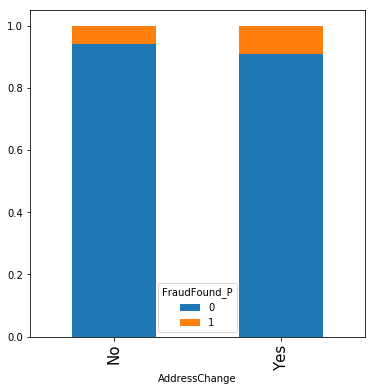

In [422]:
AddressChange.div(AddressChange.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

address change can be used as new feature , instead of address_change_claim

In [423]:
#for test data
test['AddressChange']='Yes'
test.loc[(test['AddressChange_Claim'] == 'no change') , 'AddressChange'] = 'No'

In [425]:
data['NumberOfCars'].value_counts()

1 vehicle      10698
2 vehicles       559
3 to 4           288
5 to 8            19
more than 8        1
Name: NumberOfCars, dtype: int64

In [426]:
NumberOfCars=pd.crosstab(data['NumberOfCars'],data['FraudFound_P'])

NumberOfCars.div(NumberOfCars.sum(1).astype(float),axis=0)

FraudFound_P,0,1
NumberOfCars,,
1 vehicle,0.941297,0.058703
2 vehicles,0.933810,0.066190
3 to 4,0.934028,0.065972
5 to 8,0.947368,0.052632
more than 8,1.000000,0.000000


In [427]:
#for test data
data['Cars1']='No'
data.loc[(data['NumberOfCars'] == '1 vehicle') , 'Cars1'] = 'Yes'

In [428]:
data['Cars1'].value_counts()

Yes    10698
No       867
Name: Cars1, dtype: int64

In [429]:
Cars1=pd.crosstab(data['Cars1'],data['FraudFound_P'])

Cars1.div(Cars1.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Cars1,,
No,0.934256,0.065744
Yes,0.941297,0.058703


use cars1 or no. of cars , but not a significant feature .

In [430]:
#for test data
test['Cars1']='No'
test.loc[(test['NumberOfCars'] == '1 vehicle') , 'Cars1'] = 'Yes'

In [436]:
data['DriverRating'].value_counts(dropna=False)

 3.0    2928
 1.0    2928
 4.0    2852
 2.0    2851
NaN        6
Name: DriverRating, dtype: int64

In [450]:
#filling missing value of driver rating with median
driver_median=data['DriverRating'].median()

In [451]:
data['DriverRating'].fillna(driver_median, inplace=True);

In [452]:
data['DriverRating'].value_counts(dropna=False)

3.0    2934
1.0    2928
4.0    2852
2.0    2851
Name: DriverRating, dtype: int64

In [453]:
DriverRating=pd.crosstab(data['DriverRating'],data['FraudFound_P'])
DriverRating.div(DriverRating.sum(1).astype(float),axis=0)

FraudFound_P,0,1
DriverRating,,
1.0,0.940915,0.059085
2.0,0.945984,0.054016
3.0,0.939332,0.060668
4.0,0.936886,0.063114


In [458]:
data['Driver']='Good'
data.loc[(data['DriverRating'] == 1.0) , 'Driver'] = 'Bad'
data.loc[(data['DriverRating'] == 2.0) , 'Driver'] = 'Bad'

In [459]:
data['Driver'].value_counts()

Good    5786
Bad     5779
Name: Driver, dtype: int64

In [460]:
Driver=pd.crosstab(data['Driver'],data['FraudFound_P'])
Driver.div(Driver.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Driver,,
Bad,0.943416,0.056584
Good,0.938127,0.061873


not much effect of driver feature

In [462]:
#fault and driver
data['fault_driver']='PH_bad'
data.loc[(data['Fault'] == 'Policy Holder') & (data['Driver']== 'Good') , 'fault_driver'] = 'PH_good'
data.loc[(data['Fault'] == 'Third Party') & (data['Driver']== 'Bad') , 'fault_driver'] = 'TP_bad'
data.loc[(data['Fault'] == 'Third Party') & (data['Driver']== 'Good') , 'fault_driver'] = 'TP_good'





In [463]:
data['fault_driver'].value_counts()

PH_good    4209
PH_bad     4185
TP_bad     1594
TP_good    1577
Name: fault_driver, dtype: int64

In [464]:
fault_driver=pd.crosstab(data['fault_driver'],data['FraudFound_P'])
fault_driver.div(fault_driver.sum(1).astype(float),axis=0)

FraudFound_P,0,1
fault_driver,,
PH_bad,0.924492,0.075508
PH_good,0.918983,0.081017
TP_bad,0.993099,0.006901
TP_good,0.989220,0.010780


In [465]:
data.drop('fault_driver', axis=1, inplace=True)

In [466]:
#for test data
test['Driver']='Good'
test.loc[(test['DriverRating'] == 1.0) , 'Driver'] = 'Bad'
test.loc[(test['DriverRating'] == 2.0) , 'Driver'] = 'Bad'

use one of driver rating of driver feature 

### vehicle data variables 

1. make
2. vehicle category
3. vehicle price
4. age of vehicle
5. rep number

#### vehicle category, make , vehicle price

In [501]:
data['Make'].value_counts()

Pontiac      2899
Toyota       2317
Honda        2159
Mazda        1724
Chevrolet    1253
Accura        354
Ford          338
VW            220
Dodge          77
Saab           70
Mercury        68
Saturn         41
Nisson         22
BMW             9
Jaguar          5
Mecedes         3
Porche          3
Ferrari         2
Lexus           1
Name: Make, dtype: int64

In [502]:
data["VehicleCategory"].value_counts()

Sedan      7253
Sport      4024
Utility     288
Name: VehicleCategory, dtype: int64

In [503]:
data[data['VehicleCategory']== 'Sport']['VehiclePrice'].max()

'more than 69000'

In [504]:
data['VehiclePrice'].value_counts()

20000 to 29000     6112
30000 to 39000     2640
more than 69000    1605
less than 20000     800
40000 to 59000      349
60000 to 69000       59
Name: VehiclePrice, dtype: int64

In [505]:
VehiclePrice=pd.crosstab(data['VehiclePrice'],data['FraudFound_P'])
VehiclePrice.div(VehiclePrice.sum(1).astype(float),axis=0)

FraudFound_P,0,1
VehiclePrice,,
20000 to 29000,0.946008,0.053992
30000 to 39000,0.953409,0.046591
40000 to 59000,0.939828,0.060172
60000 to 69000,0.949153,0.050847
less than 20000,0.917500,0.082500
more than 69000,0.911526,0.088474


In [506]:
data['Price']=4
data.loc[(data['VehiclePrice'] == 'less than 20000') , 'Price'] = 1
data.loc[(data['VehiclePrice'] == '20000 to 29000') , 'Price'] = 2
data.loc[(data['VehiclePrice'] == '30000 to 39000') , 'Price'] = 2
data.loc[(data['VehiclePrice'] == '40000 to 59000') , 'Price'] = 3
data.loc[(data['VehiclePrice'] == '60000 to 69000') , 'Price'] = 3

In [507]:
data['Price'].value_counts()

2    8752
4    1605
1     800
3     408
Name: Price, dtype: int64

In [508]:
Price=pd.crosstab(data['Price'],data['FraudFound_P'])
Price.div(Price.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Price,,
1,0.917500,0.082500
2,0.948240,0.051760
3,0.941176,0.058824
4,0.911526,0.088474


vehicles priced below 20000 and greater than 69000 are more fraud.

In [509]:
data[data['VehicleCategory']=='Utility']['Price'].value_counts()

4    243
3     36
2      9
Name: Price, dtype: int64

In [510]:
data[data['VehicleCategory']=='Sport']['Price'].value_counts()

2    3091
4     707
3     162
1      64
Name: Price, dtype: int64

In [511]:
a=data[data['VehicleCategory']=='Utility']
a['Price'].value_counts()

4    243
3     36
2      9
Name: Price, dtype: int64

In [512]:
a=pd.crosstab(a['Price'],a['FraudFound_P'])
a.div(a.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Price,,
2,0.888889,0.111111
3,0.944444,0.055556
4,0.864198,0.135802


In [513]:
data['Utility_pricy']=0
data.loc[(data['Price'] == 4) , 'Utility_pricy'] = 1


In [520]:
#for test data
test['Price']=4
test.loc[(test['VehiclePrice'] == 'less than 20000') , 'Price'] = 1
test.loc[(test['VehiclePrice'] == '20000 to 29000') , 'Price'] = 2
test.loc[(test['VehiclePrice'] == '30000 to 39000') , 'Price'] = 2
test.loc[(test['VehiclePrice'] == '40000 to 59000') , 'Price'] = 3
test.loc[(test['VehiclePrice'] == '60000 to 69000') , 'Price'] = 3

test['Utility_pricy']=0
test.loc[(test['Price'] == 4) , 'Utility_pricy'] = 1


In [516]:
b=data[data['VehicleCategory']=='Sport']
b['Price'].value_counts()

2    3091
4     707
3     162
1      64
Name: Price, dtype: int64

In [518]:
c=pd.crosstab(b['Price'],b['FraudFound_P'])
c.div(c.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Price,,
1,1.000000,0.000000
2,0.993206,0.006794
3,0.987654,0.012346
4,0.946252,0.053748


In [519]:
data['sport_pricy']=0
data.loc[(data['Price'] == 4) , 'sport_pricy'] = 1


In [521]:
#for test data
test['sport_pricy']=0
test.loc[(test['Price'] == 4) , 'sport_pricy'] = 1

In [522]:
d=data[data['VehicleCategory']=='Sedan']
d['Price'].value_counts()

2    5652
1     736
4     655
3     210
Name: Price, dtype: int64

In [523]:
e=pd.crosstab(d['Price'],d['FraudFound_P'])
e.div(e.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Price,,
1,0.910326,0.089674
2,0.923744,0.076256
3,0.904762,0.095238
4,0.891603,0.108397


not much value of feature with sedan category and price range

In [525]:
f=pd.crosstab(data['VehicleCategory'],data['FraudFound_P'])
f.div(f.sum(1).astype(float),axis=0)

FraudFound_P,0,1
VehicleCategory,,
Sedan,0.918930,0.081070
Sport,0.984841,0.015159
Utility,0.875000,0.125000


In [561]:
data['Make'].value_counts()

Pontiac      2899
Toyota       2317
Honda        2159
Mazda        1724
Chevrolet    1253
Accura        354
Ford          338
VW            220
Dodge          77
Saab           70
Mercury        68
Saturn         41
Nisson         22
BMW             9
Jaguar          5
Mecedes         3
Porche          3
Ferrari         2
Lexus           1
Name: Make, dtype: int64

FraudFound_P,0,1
Make,,
Accura,0.872881,0.127119
BMW,1.000000,0.000000
Chevrolet,0.940144,0.059856
Dodge,0.974026,0.025974
Ferrari,1.000000,0.000000
Ford,0.926036,0.073964
Honda,0.937934,0.062066
Jaguar,1.000000,0.000000
Lexus,1.000000,0.000000


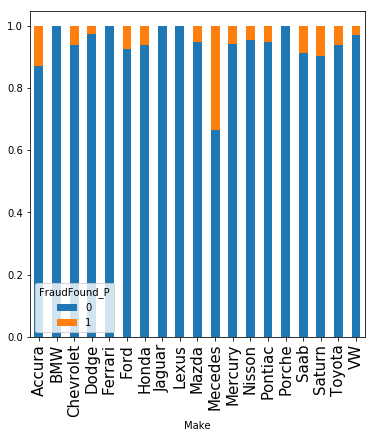

In [568]:
Make=pd.crosstab(data['Make'],data['FraudFound_P'])
Make.div(Make.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

Make.div(Make.sum(1).astype(float), axis=0)

In [563]:
data['Make_category']= 'common'
data.loc[data['Make'] == 'Lexus' , 'Make_category'] = 'rare'
data.loc[data['Make'] == 'Ferrari' , 'Make_category'] = 'rare'
data.loc[data['Make'] == 'Mecedes' , 'Make_category'] = 'rare'
data.loc[data['Make'] == 'Porche' , 'Make_category'] = 'rare'
data.loc[data['Make'] == 'Jaguar' , 'Make_category'] = 'rare'
data.loc[data['Make'] == 'BMW' , 'Make_category'] = 'rare'
data.loc[data['Make'] == 'Nisson' , 'Make_category'] = 'rare'
data.loc[data['Make'] == 'Saturn' , 'Make_category'] = 'rare'
data.loc[data['Make'] == 'Mercury' , 'Make_category'] = 'rare'
data.loc[data['Make'] == 'Saab' , 'Make_category'] = 'rare'
data.loc[data['Make'] == 'Dodge' , 'Make_category'] = 'rare'
data.loc[data['Make'] == 'VW' , 'Make_category'] = 'mid'
data.loc[data['Make'] == 'Ford' , 'Make_category'] = 'mid'
data.loc[data['Make'] == 'Accura' , 'Make_category'] = 'mid'
#data.loc[data['Make'] == 'Chevrolet' , 'Make_category'] = 'B'
#data.loc[data['Make'] == 'Mazda' , 'Make_category'] = 'B'

In [566]:
data['Make_category'].value_counts()

common    10352
mid         912
rare        301
Name: Make_category, dtype: int64

In [567]:
Make_category=pd.crosstab(data['Make_category'],data['FraudFound_P'])
Make_category.div(Make_category.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Make_category,,
common,0.942910,0.057090
mid,0.916667,0.083333
rare,0.940199,0.059801


In [562]:
make=pd.crosstab(data['Make'],data['FraudFound_P'])
make.div(make.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Make,,
Accura,0.872881,0.127119
BMW,1.000000,0.000000
Chevrolet,0.940144,0.059856
Dodge,0.974026,0.025974
Ferrari,1.000000,0.000000
Ford,0.926036,0.073964
Honda,0.937934,0.062066
Jaguar,1.000000,0.000000
Lexus,1.000000,0.000000


In [555]:
data[data['VehicleCategory']=='Utility']['Make'].value_counts()

Chevrolet    96
Pontiac      65
Accura       52
Ford         27
Mazda        27
Honda         6
Mercury       6
Nisson        4
Ferrari       2
VW            1
Porche        1
Toyota        1
Name: Make, dtype: int64

In [553]:
utility_make=data[data['VehicleCategory']=='Utility']
ut_mk=pd.crosstab(utility_make['Make'],data['FraudFound_P'])
ut_mk.div(ut_mk.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Make,,
Accura,0.711538,0.288462
Chevrolet,0.895833,0.104167
Ferrari,1.000000,0.000000
Ford,0.851852,0.148148
Honda,0.666667,0.333333
Mazda,1.000000,0.000000
Mercury,0.833333,0.166667
Nisson,1.000000,0.000000
Pontiac,0.938462,0.061538


In [556]:
data[data['VehicleCategory']=='Sport']['Make'].value_counts()

Honda        947
Pontiac      899
Toyota       712
Mazda        706
Chevrolet    419
Ford          96
VW            91
Accura        75
Dodge         32
Saab          15
Mercury       13
Saturn         7
Nisson         5
BMW            3
Porche         2
Jaguar         2
Name: Make, dtype: int64

In [558]:
sport_make=data[data['VehicleCategory']=='Sport']
sp_mk=pd.crosstab(sport_make['Make'],data['FraudFound_P'])
sp_mk.div(sp_mk.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Make,,
Accura,0.973333,0.026667
BMW,1.000000,0.000000
Chevrolet,0.990453,0.009547
Dodge,1.000000,0.000000
Ford,0.989583,0.010417
Honda,0.968321,0.031679
Jaguar,1.000000,0.000000
Mazda,0.987252,0.012748
Mercury,1.000000,0.000000


In [559]:
data[data['VehicleCategory']=='Sedan']['Make'].value_counts()

Pontiac      1935
Toyota       1604
Honda        1206
Mazda         991
Chevrolet     738
Accura        227
Ford          215
VW            128
Saab           55
Mercury        49
Dodge          45
Saturn         34
Nisson         13
BMW             6
Mecedes         3
Jaguar          3
Lexus           1
Name: Make, dtype: int64

In [560]:
sedan_make=data[data['VehicleCategory']=='Sedan']
se_mk=pd.crosstab(sedan_make['Make'],data['FraudFound_P'])
se_mk.div(se_mk.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Make,,
Accura,0.876652,0.123348
BMW,1.000000,0.000000
Chevrolet,0.917344,0.082656
Dodge,0.955556,0.044444
Ford,0.906977,0.093023
Honda,0.915423,0.084577
Jaguar,1.000000,0.000000
Lexus,1.000000,0.000000
Mazda,0.917255,0.082745


vechicle category is good feature

#### age of vehicle and rep no. 

In [528]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize', 'Policy', 'Policy_car',
       'category_policy_vehiclechange', 'Deductible_400', 'area_witness',
       'area_report', 'Claims', 'Suppliments', 'claim_none_suppliment_none',
       'PoliceReport_WitnessPresent', 'ClaimSize_bin', 'Sex_marital',
       'AddressChange', 'Cars1', 'Driver', 'Price', 'Utility_pricy',
       'sport_pricy'],
      dtype='object')

In [529]:
data['AgeOfVehicle'].value_counts()

7 years        4388
more than 7    2993
6 years        2581
5 years         990
new             285
4 years         176
3 years         100
2 years          52
Name: AgeOfVehicle, dtype: int64

In [531]:
AgeOfVehicle=pd.crosstab(data['AgeOfVehicle'],data['FraudFound_P'])
AgeOfVehicle.div(AgeOfVehicle.sum(1).astype(float),axis=0)

FraudFound_P,0,1
AgeOfVehicle,,
2 years,0.961538,0.038462
3 years,0.910000,0.090000
4 years,0.914773,0.085227
5 years,0.939394,0.060606
6 years,0.936071,0.063929
7 years,0.940747,0.059253
more than 7,0.950551,0.049449
new,0.908772,0.091228


In [537]:
data['vehicle_age']=1
data.loc[(data['AgeOfVehicle'] == 'new') , 'vehicle_age'] = 0
data.loc[(data['AgeOfVehicle'] == '2 years') , 'vehicle_age'] = 0
data.loc[(data['AgeOfVehicle'] == '3 years') , 'vehicle_age'] = 0
data.loc[(data['AgeOfVehicle'] == '4 years') , 'vehicle_age'] = 0


In [538]:
data['vehicle_age'].value_counts()

1    10952
0      613
Name: vehicle_age, dtype: int64

In [539]:
vehicle_age=pd.crosstab(data['vehicle_age'],data['FraudFound_P'])
vehicle_age.div(vehicle_age.sum(1).astype(float),axis=0)

FraudFound_P,0,1
vehicle_age,,
0,0.915171,0.084829
1,0.942202,0.057798


vehicle age feature is good.

In [540]:
#for test data
test['vehicle_age']=1
test.loc[(test['AgeOfVehicle'] == 'new') , 'vehicle_age'] = 0
test.loc[(test['AgeOfVehicle'] == '2 years') , 'vehicle_age'] = 0
test.loc[(test['AgeOfVehicle'] == '3 years') , 'vehicle_age'] = 0
test.loc[(test['AgeOfVehicle'] == '4 years') , 'vehicle_age'] = 0


In [533]:
data['RepNumber'].value_counts()

7     800
9     760
1     754
16    739
3     733
15    729
5     729
10    728
2     714
14    713
12    708
6     703
11    697
4     696
13    681
8     681
Name: RepNumber, dtype: int64

In [534]:
RepNumber=pd.crosstab(data['RepNumber'],data['FraudFound_P'])
RepNumber.div(RepNumber.sum(1).astype(float),axis=0)

FraudFound_P,0,1
RepNumber,,
1,0.933687,0.066313
2,0.946779,0.053221
3,0.934516,0.065484
4,0.952586,0.047414
5,0.946502,0.053498
6,0.927454,0.072546
7,0.936250,0.063750
8,0.941263,0.058737
9,0.935526,0.064474


In [541]:
data['Repairs']=1
data.loc[(data['RepNumber'] == 1) , 'Repairs'] = 0
data.loc[(data['RepNumber'] == 2) , 'Repairs'] = 0
data.loc[(data['RepNumber'] == 3) , 'Repairs'] = 0
data.loc[(data['RepNumber'] == 4) , 'Repairs'] = 0
data.loc[(data['RepNumber'] == 5) , 'Repairs'] = 0
data.loc[(data['RepNumber'] == 6) , 'Repairs'] = 0
data.loc[(data['RepNumber'] == 7) , 'Repairs'] = 0
data.loc[(data['RepNumber'] == 8) , 'Repairs'] = 0



In [542]:
data['Repairs'].value_counts()

0    5810
1    5755
Name: Repairs, dtype: int64

In [543]:
Repairs=pd.crosstab(data['Repairs'],data['FraudFound_P'])
Repairs.div(Repairs.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Repairs,,
0,0.939759,0.060241
1,0.941790,0.058210


In [544]:
data['repair_age']=' 0_0'
data.loc[(data['Repairs'] == 0) & (data['vehicle_age']== 1) , 'repair_age'] = '0_1'
data.loc[(data['Repairs'] == 1) & (data['vehicle_age']== 0) , 'repair_age'] = '1_0'
data.loc[(data['Repairs'] == 1) & (data['vehicle_age']== 1) , 'repair_age'] = '1_1'


In [545]:
data['repair_age'].value_counts()

0_1     5492
1_1     5460
 0_0     318
1_0      295
Name: repair_age, dtype: int64

In [546]:
repair_age=pd.crosstab(data['repair_age'],data['FraudFound_P'])
repair_age.div(repair_age.sum(1).astype(float),axis=0)

FraudFound_P,0,1
repair_age,,
0_0,0.911950,0.088050
0_1,0.941369,0.058631
1_0,0.918644,0.081356
1_1,0.943040,0.056960


not great insights 

In [547]:
data.drop('repair_age', axis=1, inplace=True)

In [548]:
# for test data 
test['Repairs']=1
test.loc[(test['RepNumber'] == 1) , 'Repairs'] = 0
test.loc[(test['RepNumber'] == 2) , 'Repairs'] = 0
test.loc[(test['RepNumber'] == 3) , 'Repairs'] = 0
test.loc[(test['RepNumber'] == 4) , 'Repairs'] = 0
test.loc[(test['RepNumber'] == 5) , 'Repairs'] = 0
test.loc[(test['RepNumber'] == 6) , 'Repairs'] = 0
test.loc[(test['RepNumber'] == 7) , 'Repairs'] = 0
test.loc[(test['RepNumber'] == 8) , 'Repairs'] = 0




#### rest of variables

In [571]:
data[data['Age']==0.0]['Age'].value_counts()

0.0    253
Name: Age, dtype: int64

In [601]:
data[data['Age']== NaN]['AgeOfPolicyHolder'].value_counts()

NameError: name 'NaN' is not defined

In [573]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize', 'Policy', 'Policy_car',
       'category_policy_vehiclechange', 'Deductible_400', 'area_witness',
       'area_report', 'Claims', 'Suppliments', 'claim_none_suppliment_none',
       'PoliceReport_WitnessPresent', 'ClaimSize_bin', 'Sex_marital',
       'AddressChange', 'Cars1', 'Driver', 'Price', 'Utility_pricy',
       'sport_pricy', 'vehicle_age', 'Repairs', 'Make_category'],
      dtype='object')

In [575]:
data['AgeOfPolicyHolder'].value_counts()

31 to 35    4199
36 to 40    3008
41 to 50    2122
51 to 65    1070
26 to 30     445
over 65      388
16 to 17     247
21 to 25      73
18 to 20      13
Name: AgeOfPolicyHolder, dtype: int64

In [576]:
data['Fault'].value_counts()

Policy Holder    8394
Third Party      3171
Name: Fault, dtype: int64

In [583]:
data[(data['Age']==0.0) & (data['Fault']=='Policy Holder')]['AgeOfPolicyHolder'].value_counts()

16 to 17    219
36 to 40      2
41 to 50      2
Name: AgeOfPolicyHolder, dtype: int64

In [605]:
data[data['Age']==16.5]['FraudFound_P'].value_counts()

Series([], Name: FraudFound_P, dtype: int64)

In [592]:
d = {16 : 16.5, 17 : 16.5}
data['Age'] = data['Age'].map(d)
data[data['Age']==16.5]

Series([], Name: Age, dtype: float64)

In [606]:
test[test['Age']==0.0]['Age'].value_counts()

0    73
Name: Age, dtype: int64

In [608]:
test[(test['Age']==0.0) & (test['Fault']=='Policy Holder')]['AgeOfPolicyHolder'].value_counts()

16 to 17    59
Name: AgeOfPolicyHolder, dtype: int64

In [598]:
data[(data['Age']==0.0)]['AgeOfPolicyHolder']

Series([], Name: AgeOfPolicyHolder, dtype: object)

In [610]:
print(test[test["Age"].isnull()]['AgeOfPolicyHolder'])


Series([], Name: AgeOfPolicyHolder, dtype: object)


In [614]:
test[test['Age'].isnull()

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
3825    True
3826    True
3827    True
3828    True
3829    True
3830    True
3831    True
3832    True
3833    True
3834    True
3835    True
3836    True
3837    True
3838    True
3839    True
3840    True
3841    True
3842    True
3843    True
3844    True
3845    True
3846    True
3847    True
3848    True
3849    True
3850    True
3851    True
3852    True
3853    True
3854    True
Name: Age, Length: 3855, dtype: bool

In [629]:
test['Age']

30    155
27    150
35    150
34    147
32    140
29    140
28    135
33    131
26    123
31    123
37    115
41    109
44    107
43    106
38    106
42    104
40    103
39     99
45     96
36     90
46     80
50     76
54     75
48     74
0      73
52     72
47     70
53     68
49     68
51     64
     ... 
63     34
21     32
57     32
61     30
25     30
23     30
65     30
60     27
59     27
62     24
18     14
20     13
75     11
71     10
72     10
76     10
66     10
78      9
77      9
19      8
79      8
68      7
74      7
80      7
67      7
73      7
70      4
69      4
17      1
16      1
Name: Age, Length: 66, dtype: int64

In [630]:
data['Age']=orignal_train['Age']

In [634]:
data[data['Age'].isnull()]['AgeOfPolicyHolder']

23       31 to 35
83       31 to 35
5015     51 to 65
8522     51 to 65
10259    31 to 35
Name: AgeOfPolicyHolder, dtype: object

In [638]:
data[23:24]['Age']==33

23    False
Name: Age, dtype: bool

In [ ]:
df['x']['C'] = 10

In [640]:
data['Age'][23]=33

C:\Users\1180s\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [651]:
data['Age'][83]=33
data['Age'][5015]=55
data['Age'][8522]=55
data['Age'][10259]=33

C:\Users\1180s\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\1180s\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\1180s\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [650]:
data[(data['Age']>50.0) &(data['Age']<65)]['Age'].median()

55.0

In [645]:
AgeOfPolicyHolder=pd.crosstab(data['AgeOfPolicyHolder'],data['FraudFound_P'])
AgeOfPolicyHolder.div(AgeOfPolicyHolder.sum(1).astype(float),axis=0)

FraudFound_P,0,1
AgeOfPolicyHolder,,
16 to 17,0.894737,0.105263
18 to 20,0.923077,0.076923
21 to 25,0.876712,0.123288
26 to 30,0.955056,0.044944
31 to 35,0.935699,0.064301
36 to 40,0.942154,0.057846
41 to 50,0.947220,0.052780
51 to 65,0.950467,0.049533
over 65,0.948454,0.051546


In [646]:
data['AgeOfPolicyHolder'].value_counts()

31 to 35    4199
36 to 40    3008
41 to 50    2122
51 to 65    1070
26 to 30     445
over 65      388
16 to 17     247
21 to 25      73
18 to 20      13
Name: AgeOfPolicyHolder, dtype: int64

In [652]:
data['Age'].isnull().sum()

0

In [662]:
print(data[(data['Age']>=16.0) &(data['Age']<=17.0)]['Age'].median())
print(data[(data['Age']>=31.0) &(data['Age']<=35.0)]['Age'].median())
print(data[(data['Age']>=36.0) &(data['Age']<=40.0)]['Age'].median())
print(data[(data['Age']>=41.0) &(data['Age']<=50.0)]['Age'].median())

16.0
33.0
38.0
45.0


In [660]:
data[data['Age']==0.0]['AgeOfPolicyHolder'].value_counts()

16 to 17    247
31 to 35      2
36 to 40      2
41 to 50      2
Name: AgeOfPolicyHolder, dtype: int64

In [664]:
data['Age]'.where((data['Age']==0.0) & (data['AgeOfPolicyHolder']=='16 to 17'), 16.0)

SyntaxError: unexpected EOF while parsing (<ipython-input-664-6cb4909fbb47>, line 1)

In [674]:
data['Age']=orignal_train['Age']

In [680]:
data['Age'].where(data["Age"]!=16,16.5,inplace=True)

In [682]:
data['Age'].where(data["Age"]!=17,16.5,inplace=True)

In [683]:
data[data['Age']==16.5]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,Sex_marital,AddressChange,Cars1,Driver,Price,Utility_pricy,sport_pricy,vehicle_age,Repairs,Make_category
86,Dec,2,Tuesday,Honda,Urban,Wednesday,Jan,2,Male,Single,...,Male_Single,No,Yes,Bad,0,1,1,0,0,common
568,Nov,1,Monday,Honda,Urban,Tuesday,Nov,2,Male,Single,...,Male_Single,No,Yes,Good,0,1,1,0,1,common
891,Aug,2,Tuesday,Honda,Urban,Thursday,Aug,2,Female,Single,...,Female_Single,No,Yes,Good,0,1,1,0,0,common
1083,Nov,2,Monday,Honda,Urban,Wednesday,Nov,2,Male,Single,...,Male_Single,No,Yes,Bad,0,1,1,0,1,common
1243,Oct,3,Tuesday,Honda,Urban,Friday,Oct,3,Male,Single,...,Male_Single,No,Yes,Good,0,1,1,0,1,common
1351,Nov,4,Saturday,Honda,Urban,Thursday,Feb,1,Male,Single,...,Male_Single,No,Yes,Good,0,1,1,0,1,common
1744,Jun,1,Tuesday,Honda,Urban,Thursday,Jun,2,Male,Single,...,Male_Single,No,Yes,Bad,0,1,1,0,0,common
2732,Jan,3,Friday,Honda,Urban,Wednesday,Jan,3,Male,Single,...,Male_Single,No,Yes,Bad,0,1,1,0,0,common
3199,May,3,Friday,Honda,Urban,Thursday,Jun,1,Male,Single,...,Male_Single,No,Yes,Bad,0,1,1,0,0,common
4326,Jun,4,Tuesday,Honda,Urban,Tuesday,Jun,4,Male,Single,...,Male_Single,No,Yes,Good,0,1,1,0,0,common


In [ ]:
df['equal_or_lower_than_4?'] = df['set_of_numbers'].apply(lambda x: 'True' if x <= 4 else 'False')

print (df)

### sex , martial status, age of policy holder , age , make , policy no .  variables

#### Sex

In [688]:
data['Sex'].value_counts()

Male      9768
Female    1797
Name: Sex, dtype: int64

In [689]:
Sex=pd.crosstab(data['Sex'],data['FraudFound_P'])
Sex.div(Sex.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Sex,,
Female,0.959377,0.040623
Male,0.937346,0.062654


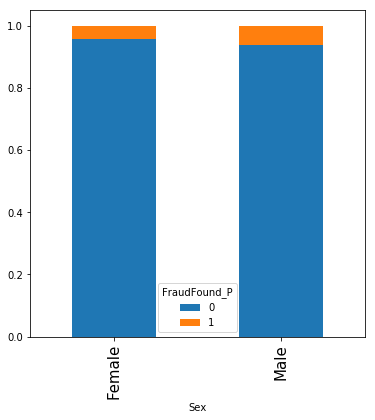

In [690]:

Sex.div(Sex.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\



Cant see a much diiference 

In [691]:
sex_marital=pd.crosstab(data['Sex'],data['MaritalStatus'])
sex_marital.div(sex_marital.sum(1).astype(float),axis=0)

MaritalStatus,Divorced,Married,Single,Widow
Sex,,,,
Female,0.018920,0.542571,0.430718,0.007791
Male,0.002764,0.717752,0.278767,0.000717


In [694]:
pd.crosstab(data['Sex'],data['MaritalStatus'])

MaritalStatus,Divorced,Married,Single,Widow
Sex,,,,
Female,34,975,774,14
Male,27,7011,2723,7


In [695]:
sex_marital.div(sex_marital.sum(0).astype(float),axis=1)

MaritalStatus,Divorced,Married,Single,Widow
Sex,,,,
Female,0.557377,0.122089,0.221333,0.666667
Male,0.442623,0.877911,0.778667,0.333333


In [692]:
data['MaritalStatus'].value_counts()

Married     7986
Single      3497
Divorced      61
Widow         21
Name: MaritalStatus, dtype: int64

In [693]:
MaritalStatus=pd.crosstab(data['MaritalStatus'],data['FraudFound_P'])
MaritalStatus.div(MaritalStatus.sum(1).astype(float),axis=0)

FraudFound_P,0,1
MaritalStatus,,
Divorced,0.950820,0.049180
Married,0.939644,0.060356
Single,0.943380,0.056620
Widow,0.904762,0.095238


In [702]:
data.shape

(11565, 55)

In [703]:
test.shape

(3855, 54)

rest is done in above fields , interaction of sex and marital status

In [704]:
data['Age'].value_counts()

33.0    443
30.0    439
31.0    426
28.0    425
34.0    425
35.0    419
29.0    412
26.0    411
32.0    404
27.0    390
39.0    336
36.0    316
41.0    314
44.0    304
43.0    298
42.0    296
37.0    295
45.0    290
40.0    280
38.0    277
0.0     253
47.0    238
55.0    223
48.0    217
46.0    216
51.0    215
50.0    213
54.0    213
52.0    204
49.0    196
       ... 
56.0    107
64.0    107
65.0    105
63.0    102
24.0     97
21.0     95
58.0     93
23.0     92
22.0     87
62.0     87
25.0     74
72.0     35
18.0     34
66.0     32
76.0     32
71.0     30
69.0     28
74.0     28
78.0     26
80.0     25
68.0     25
73.0     25
19.0     24
67.0     24
70.0     23
75.0     23
77.0     20
20.0     15
16.5     13
79.0     12
Name: Age, Length: 65, dtype: int64

In [736]:
data[data['Age'].isnull()]['AgeOfPolicyHolder']

23       31 to 35
83       31 to 35
5015     51 to 65
8522     51 to 65
10259    31 to 35
Name: AgeOfPolicyHolder, dtype: object

In [708]:
data[(data['Age'].isnull()) & (data['Fault']=='Policy Holder')]['AgeOfPolicyHolder']

83       31 to 35
5015     51 to 65
8522     51 to 65
10259    31 to 35
Name: AgeOfPolicyHolder, dtype: object

In [713]:
data['AgeOfPolicyHolder'].value_counts()

31 to 35    4199
36 to 40    3008
41 to 50    2122
51 to 65    1070
26 to 30     445
over 65      388
16 to 17     247
21 to 25      73
18 to 20      13
Name: AgeOfPolicyHolder, dtype: int64

In [737]:
data.at[23, 'Age'] =33.0
data.at[83, 'Age'] =33.0
data.at[5015, 'Age'] =56.0
data.at[8522, 'Age'] =56.0
data.at[10259, 'Age'] =33.0

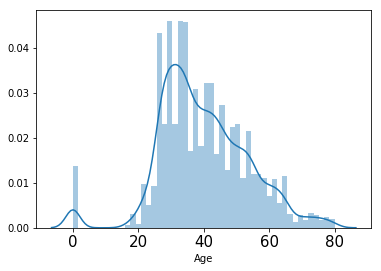

In [740]:
sns.distplot(data['Age']);

In [745]:
a=data[data['Age']==0.0]['AgeOfPolicyHolder']

In [746]:
b=data[(data['Age']==0.0) & (data['Fault']=='Policy Holder')]['AgeOfPolicyHolder']

In [747]:
a.value_counts()

16 to 17    247
31 to 35      2
36 to 40      2
41 to 50      2
Name: AgeOfPolicyHolder, dtype: int64

In [748]:
b.value_counts()

16 to 17    219
36 to 40      2
41 to 50      2
Name: AgeOfPolicyHolder, dtype: int64

In [749]:
pd.crosstab(a,data['FraudFound_P'])

FraudFound_P,0,1
AgeOfPolicyHolder,,
16 to 17,221,26
31 to 35,2,0
36 to 40,2,0
41 to 50,2,0


In [750]:
pd.crosstab(b,data['FraudFound_P'])

FraudFound_P,0,1
AgeOfPolicyHolder,,
16 to 17,193,26
36 to 40,2,0
41 to 50,2,0


In [ ]:
r i, row in colTypes.iterrows():  #i: dataframe index; row: each row in series format
    if row['type']=="categorical":
        data[row['feature']]=data[row['feature']].astype(np.object)
    elif row['type']=="continuous":
        data[row['feature']]=data[row['feature']].astype(np.float)
print data.dtypes
 

In [755]:
for i, row in data.iterrows():
    if row['Age']==16.0:
        data[row['Age']]=16.5
    if row['Age']==17.0:
        data[row['Age']]=16.5
        

In [757]:
print(data[(data['Age']>=51.0) &(data['Age']<=65.0)]['Age'].median())
print(data[(data['Age']>=31.0) &(data['Age']<=35.0)]['Age'].median())
print(data[(data['Age']>=36.0) &(data['Age']<=40.0)]['Age'].median())
print(data[(data['Age']>=41.0) &(data['Age']<=50.0)]['Age'].median())

56.0
33.0
38.0
45.0


In [769]:
data['Age'].value_counts()

33.0    446
30.0    439
31.0    426
28.0    425
34.0    425
35.0    419
29.0    412
26.0    411
32.0    404
27.0    390
39.0    336
36.0    316
41.0    314
44.0    304
43.0    298
42.0    296
37.0    295
45.0    290
40.0    280
38.0    277
0.0     253
47.0    238
55.0    223
48.0    217
46.0    216
51.0    215
50.0    213
54.0    213
52.0    204
49.0    196
       ... 
56.0    109
64.0    107
65.0    105
63.0    102
24.0     97
21.0     95
58.0     93
23.0     92
22.0     87
62.0     87
25.0     74
72.0     35
18.0     34
66.0     32
76.0     32
71.0     30
69.0     28
74.0     28
78.0     26
80.0     25
68.0     25
73.0     25
19.0     24
67.0     24
70.0     23
75.0     23
77.0     20
20.0     15
16.5     13
79.0     12
Name: Age, Length: 65, dtype: int64

In [ ]:
df1.loc[df1['stream'] == 2, 'feat'] = 10

In [774]:
data.loc[(data['Age']==0.0) &( data['AgeOfPolicyHolder']=='16 to 17'),'Age']=16.5
data.loc[(data['Age']==0.0) &( data['AgeOfPolicyHolder']=='31 to 35'),'Age']=33.0
data.loc[(data['Age']==0.0) &( data['AgeOfPolicyHolder']=='36 to 40'),'Age']=38.0
data.loc[(data['Age']==0.0) &( data['AgeOfPolicyHolder']=='41 to 50'),'Age']=45.0



In [776]:
data['Age'].value_counts()

33.0    448
30.0    439
31.0    426
34.0    425
28.0    425
35.0    419
29.0    412
26.0    411
32.0    404
27.0    390
39.0    336
36.0    316
41.0    314
44.0    304
43.0    298
42.0    296
37.0    295
45.0    292
40.0    280
38.0    279
16.5    260
47.0    238
55.0    223
48.0    217
46.0    216
51.0    215
50.0    213
54.0    213
52.0    204
49.0    196
       ... 
59.0    111
56.0    109
64.0    107
65.0    105
63.0    102
24.0     97
21.0     95
58.0     93
23.0     92
22.0     87
62.0     87
25.0     74
72.0     35
18.0     34
76.0     32
66.0     32
71.0     30
74.0     28
69.0     28
78.0     26
80.0     25
73.0     25
68.0     25
19.0     24
67.0     24
75.0     23
70.0     23
77.0     20
20.0     15
79.0     12
Name: Age, Length: 64, dtype: int64

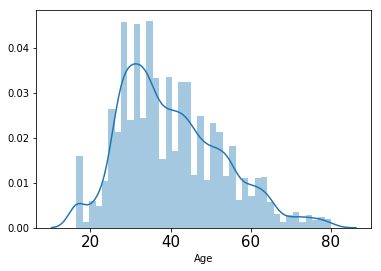

In [777]:
sns.distplot(data['Age']);

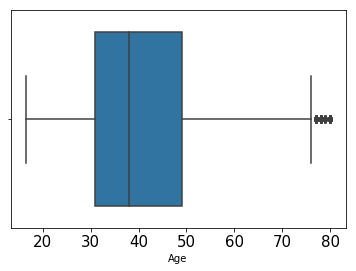

In [778]:
sns.boxplot(x='Age', data=data);

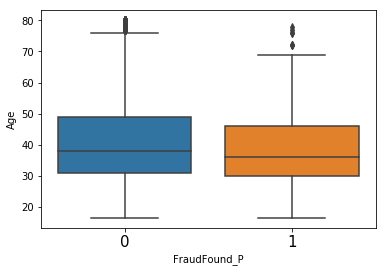

In [779]:
sns.boxplot(x='FraudFound_P', y='Age', data=data)

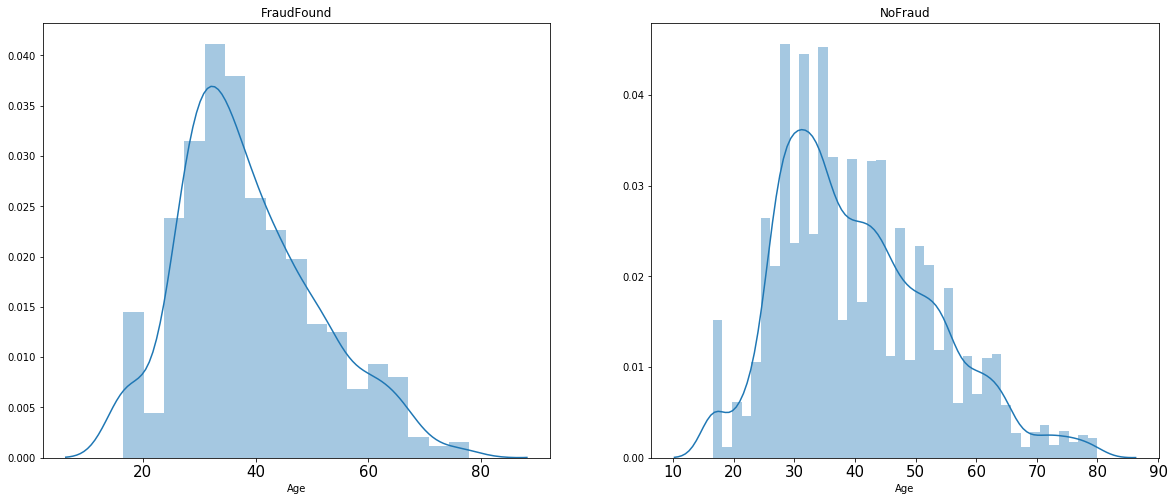

In [780]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(data[data['FraudFound_P']==1].Age,ax=ax[0])
ax[0].set_title('FraudFound')
sns.distplot(data[data['FraudFound_P']==0].Age,ax=ax[1])
ax[1].set_title('NoFraud')
#sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
#ax[2].set_title('Fares in Pclass 3')
plt.show()

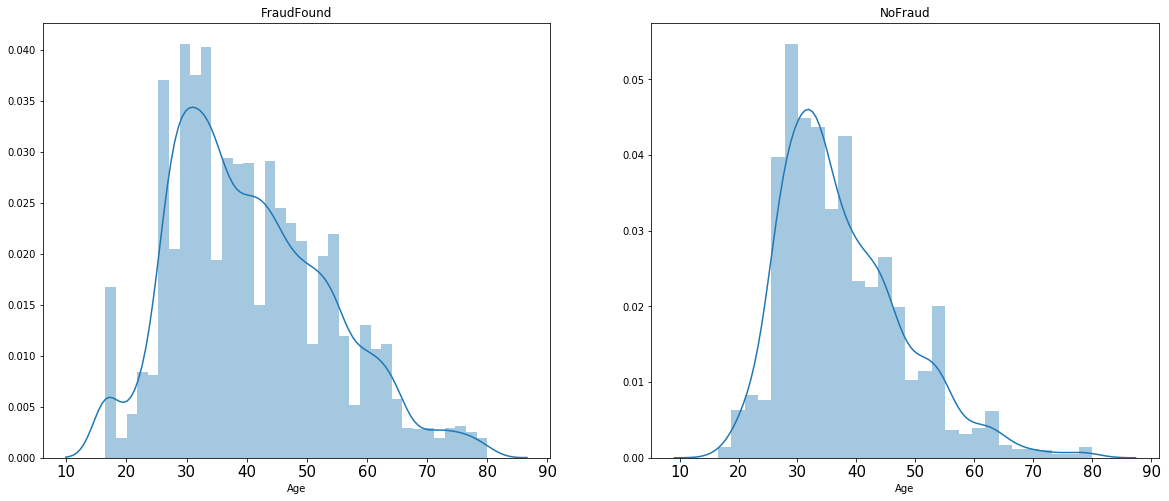

In [782]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(data[data['Sex']=='Male'].Age,ax=ax[0])
ax[0].set_title('FraudFound')
sns.distplot(data[data['Sex']=='Female'].Age,ax=ax[1])
ax[1].set_title('NoFraud')
#sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
#ax[2].set_title('Fares in Pclass 3')
plt.show()

In [783]:
data['AgeOfPolicyHolder'].value_counts()

31 to 35    4199
36 to 40    3008
41 to 50    2122
51 to 65    1070
26 to 30     445
over 65      388
16 to 17     247
21 to 25      73
18 to 20      13
Name: AgeOfPolicyHolder, dtype: int64

In [786]:
AgeOfPolicyHolder=pd.crosstab(data['AgeOfPolicyHolder'],data['FraudFound_P'])
AgeOfPolicyHolder.div(AgeOfPolicyHolder.sum(1).astype(float),axis=0)

FraudFound_P,0,1
AgeOfPolicyHolder,,
16 to 17,0.894737,0.105263
18 to 20,0.923077,0.076923
21 to 25,0.876712,0.123288
26 to 30,0.955056,0.044944
31 to 35,0.935699,0.064301
36 to 40,0.942154,0.057846
41 to 50,0.947220,0.052780
51 to 65,0.950467,0.049533
over 65,0.948454,0.051546


In [796]:
data['Age_bin']=9
data.loc[(data['Age'] <=17) , 'Age_bin'] = 1
data.loc[(data['Age'] <=20 ) & (data['Age'] >=18 ), 'Age_bin'] = 2
data.loc[(data['Age'] <=25 ) & (data['Age'] >=21 ), 'Age_bin'] = 3
data.loc[(data['Age'] <=30 ) & (data['Age'] >=26 ), 'Age_bin'] = 4
data.loc[(data['Age'] <=35 ) & (data['Age'] >=31 ), 'Age_bin'] = 5
data.loc[(data['Age'] <=40 ) & (data['Age'] >=36 ), 'Age_bin'] = 6
data.loc[(data['Age'] <=50 ) & (data['Age'] >=41 ), 'Age_bin'] = 7
data.loc[(data['Age'] <=65 ) & (data['Age'] >=51 ), 'Age_bin'] = 8

In [797]:
data['Age_bin'].value_counts()

7    2584
5    2122
8    2110
4    2077
6    1506
3     445
9     388
1     260
2      73
Name: Age_bin, dtype: int64

In [798]:
Age_bin=pd.crosstab(data['Age_bin'],data['FraudFound_P'])
Age_bin.div(Age_bin.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Age_bin,,
1,0.896154,0.103846
2,0.876712,0.123288
3,0.955056,0.044944
4,0.938373,0.061627
5,0.933082,0.066918
6,0.932935,0.067065
7,0.947755,0.052245
8,0.951185,0.048815
9,0.948454,0.051546


In [801]:
data[data['Fault']=='Third Party']['Age_bin'].value_counts()

7    694
8    620
5    616
4    570
6    375
3    142
9     95
1     36
2     23
Name: Age_bin, dtype: int64

In [802]:
data[data['Fault']=='Policy Holder']['Age_bin'].value_counts()

7    1890
4    1507
5    1506
8    1490
6    1131
3     303
9     293
1     224
2      50
Name: Age_bin, dtype: int64

In [805]:
data[data['AgeOfPolicyHolder']=='over 65']['Fault'].value_counts()

Policy Holder    293
Third Party       95
Name: Fault, dtype: int64

In [806]:
data[(data['Fault']=='Policy Holder')]['AgeOfPolicyHolder'].value_counts()

31 to 35    3013
36 to 40    2220
41 to 50    1525
51 to 65     766
26 to 30     303
over 65      293
16 to 17     219
21 to 25      50
18 to 20       5
Name: AgeOfPolicyHolder, dtype: int64

In [807]:
data[(data['Fault']=='Policy Holder')]['Age_bin'].value_counts()

7    1890
4    1507
5    1506
8    1490
6    1131
3     303
9     293
1     224
2      50
Name: Age_bin, dtype: int64

In [808]:
data[data['Age_bin']==3]['FraudFound_P'].value_counts()

0    425
1     20
Name: FraudFound_P, dtype: int64

In [811]:
data[(data['Age_bin']==3) & (data['Fault']=='Policy Holder')]['FraudFound_P'].value_counts()

0    283
1     20
Name: FraudFound_P, dtype: int64

In [817]:
data['Age_bin1']=2
data.loc[(data['Age'] <=20) , 'Age_bin1'] = 0
data.loc[(data['Age'] <=40 ) & (data['Age'] >=21 ), 'Age_bin1'] = 1


In [818]:
data['Age_bin1'].value_counts()

1    6150
2    5082
0     333
Name: Age_bin1, dtype: int64

In [820]:
Age_bin1=pd.crosstab(data['Age_bin1'],data['FraudFound_P'])
Age_bin1.div(Age_bin1.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Age_bin1,,
0,0.891892,0.108108
1,0.936423,0.063577
2,0.949233,0.050767


In [821]:
data['AgeOfPolicyHolder_bin']=2
data.loc[(data['AgeOfPolicyHolder'] =='16 to 17' ) , 'AgeOfPolicyHolder_bin'] = 0
data.loc[(data['AgeOfPolicyHolder'] =='18 to 20 ' ) , 'AgeOfPolicyHolder_bin'] = 0
data.loc[(data['AgeOfPolicyHolder'] =='21 to 25 ' ) , 'AgeOfPolicyHolder_bin'] = 0
data.loc[(data['AgeOfPolicyHolder'] =='26 to 30'), 'AgeOfPolicyHolder_bin'] = 1
data.loc[(data['AgeOfPolicyHolder'] =='31 to 35' ), 'AgeOfPolicyHolder_bin'] = 1
data.loc[(data['AgeOfPolicyHolder'] =='36 to 40' ), 'AgeOfPolicyHolder_bin'] = 1
#data.loc[(data['AgeOfPolicyHolder'] =='41 to 50' ) & (data['Age'] >=41 ), 'AgeOfPolicyHolder_bin'] = 7
#data.loc[(data['AgeOfPolicyHolder'] =='51 to 65' ) & (data['Age'] >=51 ), 'AgeOfPolicyHolder_bin'] = 8

In [822]:
data['AgeOfPolicyHolder_bin'].value_counts()

1    7652
2    3666
0     247
Name: AgeOfPolicyHolder_bin, dtype: int64

In [823]:
AgeOfPolicyHolder_bin=pd.crosstab(data['AgeOfPolicyHolder_bin'],data['FraudFound_P'])
AgeOfPolicyHolder_bin.div(AgeOfPolicyHolder_bin.sum(1).astype(float),axis=0)

FraudFound_P,0,1
AgeOfPolicyHolder_bin,,
0,0.894737,0.105263
1,0.939362,0.060638
2,0.946809,0.053191


In [825]:
data['AgeOfPolicyHolder_fault']=0
data.loc[(data['AgeOfPolicyHolder']=='21 to 25') & (data['Fault']=='Policy Holder'),'AgeOfPolicyHolder_fault']=1

In [861]:
data['AgeOfPolicyHolder_fault'].value_counts()

0    11515
1       50
Name: AgeOfPolicyHolder_fault, dtype: int64

In [862]:
AgeOfPolicyHolder_fault=pd.crosstab(data['AgeOfPolicyHolder_fault'],data['FraudFound_P'])
AgeOfPolicyHolder_fault.div(AgeOfPolicyHolder_fault.sum(1).astype(float),axis=0)

FraudFound_P,0,1
AgeOfPolicyHolder_fault,,
0,0.941294,0.058706
1,0.820000,0.180000


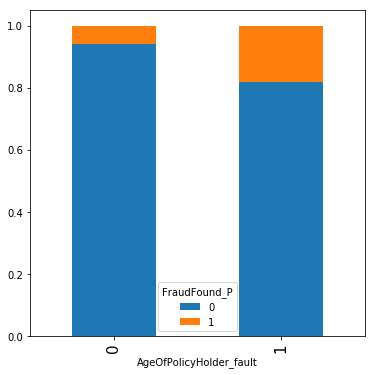

In [863]:

AgeOfPolicyHolder_fault.div(AgeOfPolicyHolder_fault.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\



In [828]:
data.shape

(11565, 61)

In [829]:
test.shape

(3855, 54)

In [830]:
data.columns

Index([                        'Month',                   'WeekOfMonth',
                           'DayOfWeek',                          'Make',
                        'AccidentArea',              'DayOfWeekClaimed',
                        'MonthClaimed',            'WeekOfMonthClaimed',
                                 'Sex',                 'MaritalStatus',
                                 'Age',                         'Fault',
                          'PolicyType',               'VehicleCategory',
                        'VehiclePrice',                  'FraudFound_P',
                        'PolicyNumber',                     'RepNumber',
                          'Deductible',                  'DriverRating',
                'Days_Policy_Accident',             'Days_Policy_Claim',
                  'PastNumberOfClaims',                  'AgeOfVehicle',
                   'AgeOfPolicyHolder',             'PoliceReportFiled',
                      'WitnessPresent',            

In [833]:
data.drop(0.0, axis=1, inplace=True)

In [834]:
data.drop('AgeOfPolicyHolder_bin', axis=1, inplace=True)

In [835]:
data.drop('Age_bin',axis=1,inplace=True)

In [840]:
data.drop('age_bin1',axis=1,inplace=True)


In [841]:
test.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize', 'FraudFound_P', 'Policy', 'Policy_car',
       'category_policy_vehiclechange', 'Deductible_400', 'area_report',
       'area_witness', 'claim_none_suppliment_none', 'Suppliments', 'Claims',
       'PoliceReport_WitnessPresent', 'ClaimSize_bin', 'AddressChange',
       'Cars1', 'Driver', 'Price', 'Utility_pricy', 'sport_pricy',
       'vehicle_age', 'Repairs', 'Sex_marital'],
      dtype='object')

In [842]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize', 'Policy', 'Policy_car',
       'category_policy_vehiclechange', 'Deductible_400', 'area_witness',
       'area_report', 'Claims', 'Suppliments', 'claim_none_suppliment_none',
       'PoliceReport_WitnessPresent', 'ClaimSize_bin', 'Sex_marital',
       'AddressChange', 'Cars1', 'Driver', 'Price', 'Utility_pricy',
       'sport_pricy', 'vehicle_age', 'Repairs', 'Make_category', 'Age_bin1',
       'Ag

In [843]:
data.shape

(11565, 57)

In [844]:
test.shape

(3855, 54)

In [845]:
#for test data
test['AgeOfPolicyHolder_fault']=0
test.loc[(test['AgeOfPolicyHolder']=='21 to 25') & (test['Fault']=='Policy Holder'),'AgeOfPolicyHolder_fault']=1

In [848]:
#for test data
test.loc[(test['Age']==0.0) &( test['AgeOfPolicyHolder']=='16 to 17'),'Age']=16.5



In [850]:
#for test data
test['Age_bin1']=2
test.loc[(data['Age'] <=20) , 'Age_bin1'] = 0
test.loc[(data['Age'] <=40 ) & (data['Age'] >=21 ), 'Age_bin1'] = 1


In [851]:
data.shape

(11565, 57)

In [852]:
test.shape

(3855, 56)

In [854]:
#for test data , feature of make _category
test['Make_category']= 'common'
test.loc[test['Make'] == 'Lexus' , 'Make_category'] = 'rare'
test.loc[test['Make'] == 'Ferrari' , 'Make_category'] = 'rare'
test.loc[test['Make'] == 'Mecedes' , 'Make_category'] = 'rare'
test.loc[test['Make'] == 'Porche' , 'Make_category'] = 'rare'
test.loc[test['Make'] == 'Jaguar' , 'Make_category'] = 'rare'
test.loc[test['Make'] == 'BMW' , 'Make_category'] = 'rare'
test.loc[test['Make'] == 'Nisson' , 'Make_category'] = 'rare'
test.loc[test['Make'] == 'Saturn' , 'Make_category'] = 'rare'
test.loc[test['Make'] == 'Mercury' , 'Make_category'] = 'rare'
test.loc[test['Make'] == 'Saab' , 'Make_category'] = 'rare'
test.loc[test['Make'] == 'Dodge' , 'Make_category'] = 'rare'
test.loc[test['Make'] == 'VW' , 'Make_category'] = 'mid'
test.loc[test['Make'] == 'Ford' , 'Make_category'] = 'mid'
test.loc[test['Make'] == 'Accura' , 'Make_category'] = 'mid'
#data.loc[data['Make'] == 'Chevrolet' , 'Make_category'] = 'B'
#data.loc[data['Make'] == 'Mazda' , 'Make_category'] = 'B'

In [855]:
test.shape

(3855, 57)

### month year day week variable

year

In [857]:
data['Year'].value_counts()

1994    4596
1995    3923
1996    3046
Name: Year, dtype: int64

In [858]:
Year=pd.crosstab(data['Year'],data['FraudFound_P'])
Year.div(Year.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Year,,
1994,0.932332,0.067668
1995,0.944175,0.055825
1996,0.949114,0.050886


small decrement in fraud cases with year

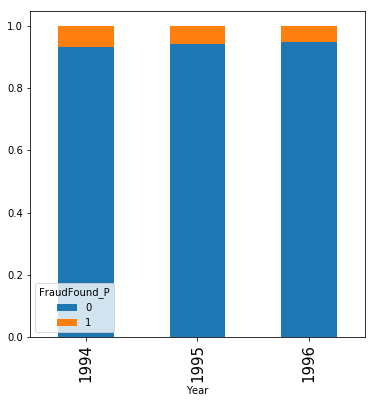

In [860]:

Year.div(Year.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\



In [864]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize', 'Policy', 'Policy_car',
       'category_policy_vehiclechange', 'Deductible_400', 'area_witness',
       'area_report', 'Claims', 'Suppliments', 'claim_none_suppliment_none',
       'PoliceReport_WitnessPresent', 'ClaimSize_bin', 'Sex_marital',
       'AddressChange', 'Cars1', 'Driver', 'Price', 'Utility_pricy',
       'sport_pricy', 'vehicle_age', 'Repairs', 'Make_category', 'Age_bin1',
       'Ag

In [866]:
data['Month'].value_counts()

Jan    1056
May    1028
Mar     995
Jun     981
Oct     973
Dec     970
Apr     959
Sep     952
Feb     949
Jul     938
Nov     913
Aug     851
Name: Month, dtype: int64

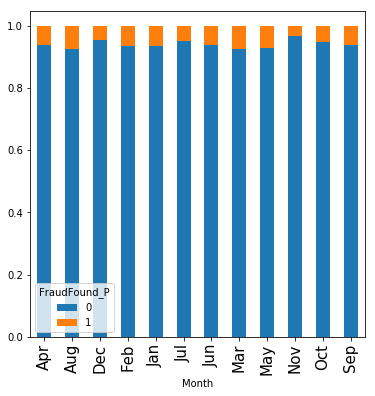

In [874]:
Month=pd.crosstab(data['Month'],data['FraudFound_P'])
Month.div(Month.sum(1).astype(float),axis=0)

Month.div(Month.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [875]:
Month.div(Month.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Month,,
Apr,0.937435,0.062565
Aug,0.924794,0.075206
Dec,0.953608,0.046392
Feb,0.935722,0.064278
Jan,0.936553,0.063447
Jul,0.950959,0.049041
Jun,0.939857,0.060143
Mar,0.924623,0.075377
May,0.928988,0.071012


In [876]:
data['FraudFound_P'].value_counts()

0    10880
1      685
Name: FraudFound_P, dtype: int64

In [877]:
data['WeekOfMonth'].value_counts()

3    2750
2    2681
4    2529
1    2389
5    1216
Name: WeekOfMonth, dtype: int64

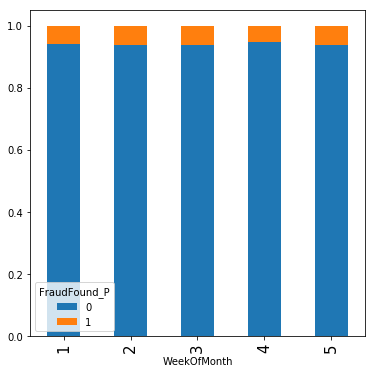

In [881]:
WeekOfMonth=pd.crosstab(data['WeekOfMonth'],data['FraudFound_P'])
WeekOfMonth.div(WeekOfMonth.sum(1).astype(float),axis=0)

WeekOfMonth.div(WeekOfMonth.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [882]:
WeekOfMonth.div(WeekOfMonth.sum(1).astype(float),axis=0)

FraudFound_P,0,1
WeekOfMonth,,
1,0.939305,0.060695
2,0.938456,0.061544
3,0.938545,0.061455
4,0.948201,0.051799
5,0.938322,0.061678


no significant difference if week of month

In [883]:
data['DayOfWeek'].value_counts()

Monday       2000
Friday       1838
Tuesday      1737
Thursday     1624
Wednesday    1565
Saturday     1469
Sunday       1332
Name: DayOfWeek, dtype: int64

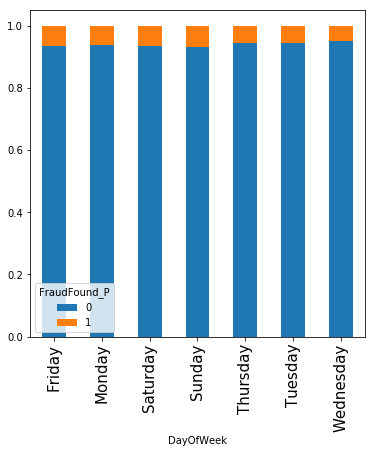

In [884]:
DayOfWeek=pd.crosstab(data['DayOfWeek'],data['FraudFound_P'])
DayOfWeek.div(DayOfWeek.sum(1).astype(float),axis=0)

DayOfWeek.div(DayOfWeek.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [885]:
DayOfWeek.div(DayOfWeek.sum(1).astype(float),axis=0)

FraudFound_P,0,1
DayOfWeek,,
Friday,0.935800,0.064200
Monday,0.939500,0.060500
Saturday,0.934649,0.065351
Sunday,0.932432,0.067568
Thursday,0.943966,0.056034
Tuesday,0.945884,0.054116
Wednesday,0.952077,0.047923


more accindents on weekends ,i.e unlikely ..therfore more chances of fraud

In [888]:
d1 = {'Tuesday' : 0,'Wednesday': 0,'Thursday' :0, 'Friday': 1, 'Saturday': 2, 'Sunday' : 2, 'Monday':1}
data['Rush_accident'] = data['DayOfWeek'].map(d1)
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,Price,Utility_pricy,sport_pricy,vehicle_age,Repairs,Make_category,Age_bin1,AgeOfPolicyHolder_fault,Rush&accident,Rush_accident
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,0,1,1,0,1,common,1,0,0,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,4,1,1,1,1,common,1,0,0,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,4,1,1,1,0,common,2,0,1,1
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,2,0,0,1,0,common,2,0,2,2
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,4,1,1,1,1,common,1,0,2,2


FraudFound_P,0,1
Rush_accident,,
0,0.947219,0.052781
1,0.937728,0.062272
2,0.933595,0.066405


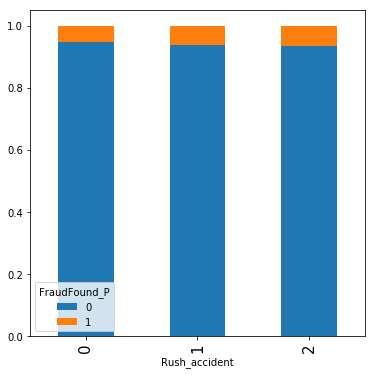

In [889]:
Rush_accident=pd.crosstab(data['Rush_accident'],data['FraudFound_P'])
Rush_accident.div(Rush_accident.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\

Rush_accident.div(Rush_accident.sum(1).astype(float), axis=0)

on weekend less cases of accident , but more fraud cases ... on weekdays more accident , less fraud .. on monday and friday most accidents therefore high fraud rate

In [890]:
#for test data
d1 = {'Tuesday' : 0,'Wednesday': 0,'Thursday' :0, 'Friday': 1, 'Saturday': 2, 'Sunday' : 2, 'Monday':1}
test['Rush_accident'] = test['DayOfWeek'].map(d1)


In [ ]:
DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed

In [891]:
data['DayOfWeekClaimed'].value_counts()

Monday       2811
Tuesday      2545
Wednesday    2232
Thursday     2000
Friday       1842
Saturday       94
Sunday         40
0               1
Name: DayOfWeekClaimed, dtype: int64

In [892]:

data.loc[(data['DayOfWeekClaimed']==0) ,'DayOfWeekClaimed']='Monday'



In [893]:
data['DayOfWeekClaimed'].value_counts()

Monday       2812
Tuesday      2545
Wednesday    2232
Thursday     2000
Friday       1842
Saturday       94
Sunday         40
Name: DayOfWeekClaimed, dtype: int64

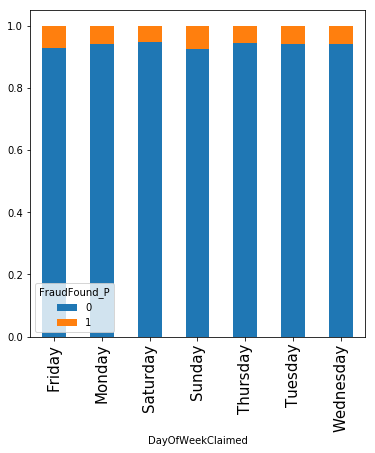

In [894]:
DayOfWeekClaimed=pd.crosstab(data['DayOfWeekClaimed'],data['FraudFound_P'])
DayOfWeekClaimed.div(DayOfWeekClaimed.sum(1).astype(float),axis=0)

DayOfWeekClaimed.div(DayOfWeekClaimed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [895]:
DayOfWeekClaimed.div(DayOfWeekClaimed.sum(1).astype(float),axis=0)

FraudFound_P,0,1
DayOfWeekClaimed,,
Friday,0.930510,0.069490
Monday,0.943101,0.056899
Saturday,0.946809,0.053191
Sunday,0.925000,0.075000
Thursday,0.945000,0.055000
Tuesday,0.940275,0.059725
Wednesday,0.943100,0.056900


In [896]:
data['MonthClaimed'].value_counts()

Jan    1084
May    1038
Mar    1005
Oct     995
Nov     973
Apr     970
Jun     967
Feb     955
Sep     944
Jul     908
Dec     879
Aug     846
0         1
Name: MonthClaimed, dtype: int64

In [903]:

data.loc[(data['MonthClaimed']=='August') ,'MonthClaimed']='Aug'



In [904]:
data['MonthClaimed'].value_counts()

Jan    1084
May    1038
Mar    1005
Oct     995
Nov     973
Apr     970
Jun     967
Feb     955
Sep     944
Jul     908
Dec     879
Aug     847
Name: MonthClaimed, dtype: int64

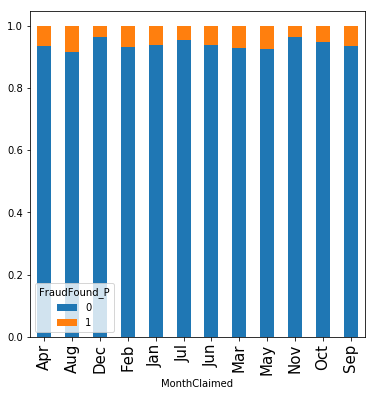

In [905]:
MonthClaimed=pd.crosstab(data['MonthClaimed'],data['FraudFound_P'])
MonthClaimed.div(MonthClaimed.sum(1).astype(float),axis=0)

MonthClaimed.div(MonthClaimed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [906]:
MonthClaimed.div(MonthClaimed.sum(1).astype(float),axis=0)

FraudFound_P,0,1
MonthClaimed,,
Apr,0.936082,0.063918
Aug,0.917355,0.082645
Dec,0.964733,0.035267
Feb,0.934031,0.065969
Jan,0.938192,0.061808
Jul,0.954846,0.045154
Jun,0.938987,0.061013
Mar,0.928358,0.071642
May,0.925819,0.074181


In [908]:
data['WeekOfMonthClaimed'].value_counts()

2    2787
3    2715
4    2567
1    2557
5     939
Name: WeekOfMonthClaimed, dtype: int64

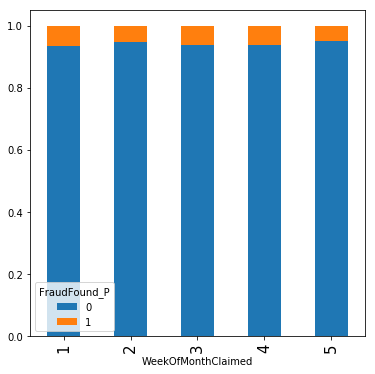

In [909]:
WeekOfMonthClaimed=pd.crosstab(data['WeekOfMonthClaimed'],data['FraudFound_P'])
WeekOfMonthClaimed.div(WeekOfMonthClaimed.sum(1).astype(float),axis=0)

WeekOfMonthClaimed.div(WeekOfMonthClaimed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [910]:
WeekOfMonthClaimed.div(WeekOfMonthClaimed.sum(1).astype(float),axis=0)

FraudFound_P,0,1
WeekOfMonthClaimed,,
1,0.934689,0.065311
2,0.947614,0.052386
3,0.938490,0.061510
4,0.938839,0.061161
5,0.948882,0.051118


#cant say much coz of week no

In [911]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize', 'Policy', 'Policy_car',
       'category_policy_vehiclechange', 'Deductible_400', 'area_witness',
       'area_report', 'Claims', 'Suppliments', 'claim_none_suppliment_none',
       'PoliceReport_WitnessPresent', 'ClaimSize_bin', 'Sex_marital',
       'AddressChange', 'Cars1', 'Driver', 'Price', 'Utility_pricy',
       'sport_pricy', 'vehicle_age', 'Repairs', 'Make_category', 'Age_bin1',
       'Ag

In [912]:
data['Days_Policy_Accident'].value_counts()

more than 30    11439
8 to 15            44
none               39
15 to 30           32
1 to 7             11
Name: Days_Policy_Accident, dtype: int64

In [913]:
data['Days_Policy_Claim'].value_counts()

more than 30    11504
15 to 30           47
8 to 15            13
none                1
Name: Days_Policy_Claim, dtype: int64

In [938]:

d2 = {'more than 30' : 1,'15 to 30': 0,'8 to 15' :0, 'none': 1}
data['claim_after_policy'] = data['Days_Policy_Claim'].map(d2)


In [940]:
data['claim_after_policy'].value_counts()

1    11505
0       60
Name: claim_after_policy, dtype: int64

In [954]:
#for test data
test['claim_after_policy'] = test['Days_Policy_Claim'].map(d2)
test['acident_after_policy']=test['Days_Policy_Accident'].map(d3)

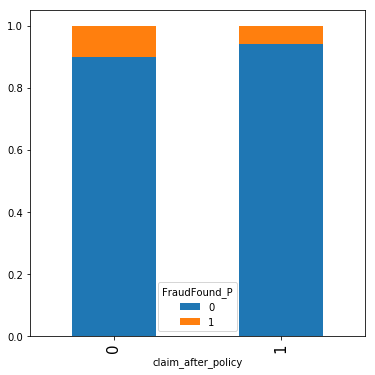

In [942]:
claim_after_policy=pd.crosstab(data['claim_after_policy'],data['FraudFound_P'])
claim_after_policy.div(claim_after_policy.sum(1).astype(float),axis=0)

claim_after_policy.div(claim_after_policy.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [944]:
claim_after_policy.div(claim_after_policy.sum(1).astype(float),axis=0)

FraudFound_P,0,1
claim_after_policy,,
0,0.900000,0.100000
1,0.940982,0.059018


In [939]:
d3 = {'more than 30' : 1,'15 to 30': 0,'8 to 15' :0, 'none': 1,'1 to 7':0}
data['acident_after_policy']=data['Days_Policy_Accident'].map(d3)

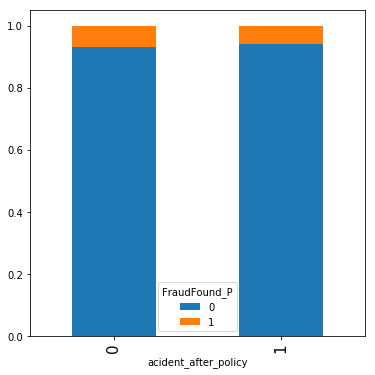

In [943]:
acident_after_policy=pd.crosstab(data['acident_after_policy'],data['FraudFound_P'])
acident_after_policy.div(acident_after_policy.sum(1).astype(float),axis=0)

acident_after_policy.div(acident_after_policy.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [945]:
acident_after_policy.div(acident_after_policy.sum(1).astype(float),axis=0)

FraudFound_P,0,1
acident_after_policy,,
0,0.931034,0.068966
1,0.940843,0.059157


In [949]:
data['more_time']=0
data.loc[(data['claim_after_policy']==1) & (data['acident_after_policy']==1),'more_time' ]=1

In [953]:
data.drop('more_time',axis =1 , inplace=True)

In [950]:
data['more_time'].value_counts()

1    11463
0      102
Name: more_time, dtype: int64

In [952]:
more_time=pd.crosstab(data['more_time'],data['FraudFound_P'])
more_time.div(more_time.sum(1).astype(float),axis=0)

FraudFound_P,0,1
more_time,,
0,0.911765,0.088235
1,0.941028,0.058972


In [941]:
data['acident_after_policy'].value_counts()

1    11478
0       87
Name: acident_after_policy, dtype: int64

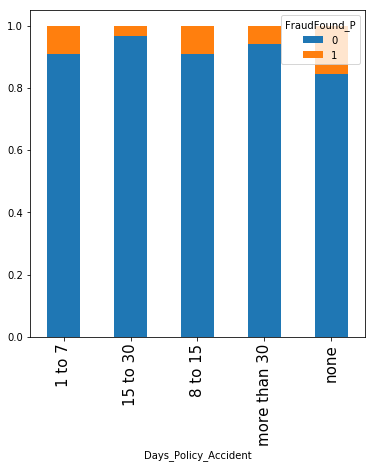

In [914]:
Days_Policy_Accident=pd.crosstab(data['Days_Policy_Accident'],data['FraudFound_P'])
Days_Policy_Accident.div(Days_Policy_Accident.sum(1).astype(float),axis=0)

Days_Policy_Accident.div(Days_Policy_Accident.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [917]:
Days_Policy_Accident.div(Days_Policy_Accident.sum(1).astype(float),axis=0)


FraudFound_P,0,1
Days_Policy_Accident,,
1 to 7,0.909091,0.090909
15 to 30,0.968750,0.031250
8 to 15,0.909091,0.090909
more than 30,0.941166,0.058834
none,0.846154,0.153846


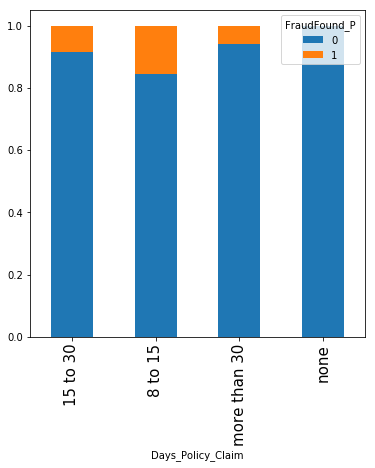

In [915]:
Days_Policy_Claim=pd.crosstab(data['Days_Policy_Claim'],data['FraudFound_P'])
Days_Policy_Claim.div(Days_Policy_Claim.sum(1).astype(float),axis=0)

Days_Policy_Claim.div(Days_Policy_Claim.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [916]:
Days_Policy_Claim.div(Days_Policy_Claim.sum(1).astype(float),axis=0)

FraudFound_P,0,1
Days_Policy_Claim,,
15 to 30,0.914894,0.085106
8 to 15,0.846154,0.153846
more than 30,0.940977,0.059023
none,1.000000,0.000000


In [930]:
data['SameMonth_report']=0
data.loc[data['Month']==data['MonthClaimed'],'SameMonth_report']= '1'

In [931]:
data['SameMonth_report'].value_counts()

1    8588
0    2977
Name: SameMonth_report, dtype: int64

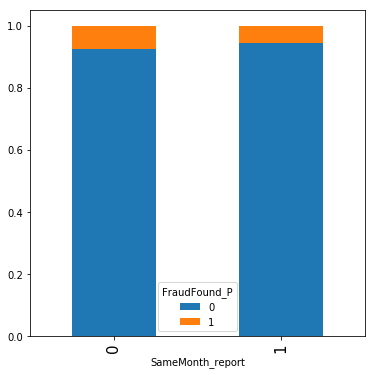

In [932]:
SameMonth_report=pd.crosstab(data['SameMonth_report'],data['FraudFound_P'])
SameMonth_report.div(SameMonth_report.sum(1).astype(float),axis=0)

SameMonth_report.div(SameMonth_report.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))\


In [933]:
SameMonth_report.div(SameMonth_report.sum(1).astype(float),axis=0)

FraudFound_P,0,1
SameMonth_report,,
0,0.926436,0.073564
1,0.945738,0.054262


can be used as a feature

In [934]:
#for test data
test['SameMonth_report']=0
test.loc[test['Month']==test['MonthClaimed'],'SameMonth_report']= '1'

In [935]:
data.shape , test.shape

((11565, 60), (3855, 59))

In [936]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize', 'Policy', 'Policy_car',
       'category_policy_vehiclechange', 'Deductible_400', 'area_witness',
       'area_report', 'Claims', 'Suppliments', 'claim_none_suppliment_none',
       'PoliceReport_WitnessPresent', 'ClaimSize_bin', 'Sex_marital',
       'AddressChange', 'Cars1', 'Driver', 'Price', 'Utility_pricy',
       'sport_pricy', 'vehicle_age', 'Repairs', 'Make_category', 'Age_bin1',
       'Ag

In [937]:
data.drop('Rush&accident',axis=1 , inplace=True )

In [955]:
data.shape , test.shape

((11565, 61), (3855, 61))

### encoding 

In [972]:
data.iloc[0:5,0:10]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus
0,2,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single
1,4,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single
2,10,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married
3,6,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married
4,3,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married


In [967]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [969]:
month_encode = le.fit(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [970]:
data['Month'] = month_encode.transform(data['Month'])

In [973]:
data['Sex'] = le.fit_transform(data['Sex']) 

In [975]:
DayOfWeek_encode=le.fit(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
data['DayOfWeek'] = DayOfWeek_encode.transform(data['DayOfWeek'])

In [977]:
data['AccidentArea'] = le.fit_transform(data['AccidentArea']) 

In [976]:
data = pd.get_dummies(data, columns=['Make','MaritalStatus'])


In [978]:
DayOfWeekClaimed_encode=le.fit(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
data['DayOfWeekClaimed'] = DayOfWeekClaimed_encode.transform(data['DayOfWeekClaimed'])

In [979]:
MonthClaimed_encode = le.fit(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
data['MonthClaimed'] = MonthClaimed_encode.transform(data['MonthClaimed'])

In [987]:
#for test data
month_encode = le.fit(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
test['Month'] = month_encode.transform(test['Month'])
test['Sex'] = le.fit_transform(test['Sex']) 
DayOfWeek_encode=le.fit(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
test['DayOfWeek'] = DayOfWeek_encode.transform(test['DayOfWeek'])
test['AccidentArea'] = le.fit_transform(test['AccidentArea']) 
test = pd.get_dummies(test, columns=['Make','MaritalStatus'])
DayOfWeekClaimed_encode=le.fit(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
test['DayOfWeekClaimed'] = DayOfWeekClaimed_encode.transform(test['DayOfWeekClaimed'])
MonthClaimed_encode = le.fit(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
test['MonthClaimed'] = MonthClaimed_encode.transform(test['MonthClaimed'])



In [986]:
data.iloc[0:5,7:20]

,Sex,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim
0,0,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30
1,1,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30
2,1,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30
3,1,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30
4,1,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30


In [989]:
data['Fault'] = le.fit_transform(data['Fault']) 
data = pd.get_dummies(data, columns=['VehicleCategory','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim'])


In [990]:
#for test data
#test['Fault'] = le.fit_transform(data['Fault']) 
test = pd.get_dummies(test, columns=['VehicleCategory','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim'])


In [991]:
data['Fault'].value_counts()

0    8394
1    3171
Name: Fault, dtype: int64

In [993]:
test['Fault'].head()

0      Third Party
1      Third Party
2    Policy Holder
3    Policy Holder
4      Third Party
Name: Fault, dtype: object

In [995]:
value=data['Sex']
le.fit(value.values)
data['Sex']=le.transform(data['Sex'])
test['Sex']=le.transform(test['Sex'])

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [996]:
data['Sex'].value_counts()

1    9768
0    1797
Name: Sex, dtype: int64

In [997]:
test['Sex'].value_counts()

1    3232
0     623
Name: Sex, dtype: int64

In [1004]:
test['Fault']=orignal_test['Fault']

In [1005]:
test['Fault'].head()

0      Third Party
1      Third Party
2    Policy Holder
3    Policy Holder
4      Third Party
Name: Fault, dtype: object

In [1006]:
d5 = {'Policy Holder': 0, 'Third Party': 1}
test['Fault'] = test['Fault'].map(d5)
test['Fault'].head()

0    1
1    1
2    0
3    0
4    1
Name: Fault, dtype: int64

In [1007]:
data.iloc[0:5,7:20]

,Sex,Age,Fault,PolicyType,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled
0,0,21.0,0,Sport - Liability,0,1,12,300,1.0,none,3 years,26 to 30,No
1,1,34.0,0,Sport - Collision,0,2,15,400,4.0,none,6 years,31 to 35,Yes
2,1,47.0,0,Sport - Collision,0,3,7,400,3.0,1,7 years,41 to 50,No
3,1,65.0,1,Sedan - Liability,0,4,4,400,2.0,1,more than 7,51 to 65,Yes
4,1,36.0,1,Sport - Collision,0,7,14,400,1.0,1,7 years,36 to 40,No


In [1009]:
data.drop('PolicyType',axis=1 , inplace=True)

In [1010]:
test.drop('PolicyType',axis=1,inplace=True)

In [1011]:
data.drop('PolicyNumber',axis=1 , inplace=True)
test.drop('PolicyNumber',axis=1,inplace=True)

In [1012]:
data.shape , test.shape

((11565, 94), (3855, 91))

In [1013]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault',
       'FraudFound_P', 'RepNumber', 'Deductible', 'DriverRating',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize', 'Policy', 'Policy_car',
       'category_policy_vehiclechange', 'Deductible_400', 'area_witness',
       'area_report', 'Claims', 'Suppliments', 'claim_none_suppliment_none',
       'PoliceReport_WitnessPresent', 'ClaimSize_bin', 'Sex_marital',
       'AddressChange', 'Cars1', 'Driver', 'Price', 'Utility_pricy',
       'sport_pricy', 'vehicle_age', 'Repairs', 'Make_category', 'Age_bin1',
       'AgeOfPolicyHolder_fault', 'Rush_accident', 'SameMonth_report',
       'claim_after_policy', 'acident_after_policy', 'Make_Accura', 'Make_BMW',
       '

In [1014]:
test.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault',
       'RepNumber', 'Deductible', 'DriverRating', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'ClaimSize', 'FraudFound_P', 'Policy', 'Policy_car',
       'category_policy_vehiclechange', 'Deductible_400', 'area_report',
       'area_witness', 'claim_none_suppliment_none', 'Suppliments', 'Claims',
       'PoliceReport_WitnessPresent', 'ClaimSize_bin', 'AddressChange',
       'Cars1', 'Driver', 'Price', 'Utility_pricy', 'sport_pricy',
       'vehicle_age', 'Repairs', 'Sex_marital', 'AgeOfPolicyHolder_fault',
       'Age_bin1', 'Make_category', 'Rush_accident', 'SameMonth_report',
       'claim_after_policy', 'acident_after_policy', 'Make_Accura', 'Make_BMW',
       '

In [ ]:
'Make_Accura', 'Make_BMW',
       'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari', 'Make_Ford',
       'Make_Honda', 'Make_Jaguar', 'Make_Lexus', 'Make_Mazda', 'Make_Mecedes',
       'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche',
       'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW

In [1015]:
data.drop(['Make_Accura', 'Make_BMW',
       'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari', 'Make_Ford',
       'Make_Honda', 'Make_Jaguar', 'Make_Lexus', 'Make_Mazda', 'Make_Mecedes',
       'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche',
       'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW'],axis=1, inplace=True)

In [1016]:
test.drop(['Make_Accura', 'Make_BMW',
       'Make_Chevrolet', 'Make_Dodge', 'Make_Ford', 'Make_Honda',
       'Make_Jaguar', 'Make_Mazda', 'Make_Mecedes', 'Make_Mercury',
       'Make_Nisson', 'Make_Pontiac', 'Make_Porche', 'Make_Saab',
       'Make_Saturn', 'Make_Toyota', 'Make_VW'],axis=1, inplace=True)

In [1017]:
data.drop([ 'Days_Policy_Accident_1 to 7', 'Days_Policy_Accident_15 to 30',
       'Days_Policy_Accident_8 to 15', 'Days_Policy_Accident_more than 30',
       'Days_Policy_Accident_none', 'Days_Policy_Claim_15 to 30',
       'Days_Policy_Claim_8 to 15', 'Days_Policy_Claim_more than 30',
       'Days_Policy_Claim_none'],axis=1 , inplace=True)

In [1018]:
test.drop(['Days_Policy_Accident_1 to 7',
       'Days_Policy_Accident_15 to 30', 'Days_Policy_Accident_8 to 15',
       'Days_Policy_Accident_more than 30', 'Days_Policy_Accident_none',
       'Days_Policy_Claim_15 to 30', 'Days_Policy_Claim_8 to 15',
       'Days_Policy_Claim_more than 30'],axis=1,inplace=True)

In [1019]:
data.shape

(11565, 66)

In [1020]:
test.shape

(3855, 66)

In [1023]:
data.iloc[0:5,14:30]

,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize,Policy,Policy_car,category_policy_vehiclechange,Deductible_400
0,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421,Liability,Sport,0,0
1,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571,Collision,Sport,0,1
2,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320,Collision,Sport,0,1
3,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493,Liability,Sedan,1,1
4,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339,Collision,Sport,0,1


In [1024]:
data['PastNumberOfClaims'].value_counts()

2 to 4         4140
none           3286
1              2675
more than 4    1464
Name: PastNumberOfClaims, dtype: int64

In [1028]:
test['PastNumberOfClaims'].value_counts()

2 to 4         1345
none           1066
1               898
more than 4     546
Name: PastNumberOfClaims, dtype: int64

In [1032]:
d6 = {'none': 0, 1: 1,'2 to 4':2,'more than 4': 3}
data['PastNumberOfClaims'] = data['PastNumberOfClaims'].map(d6)
test['PastNumberOfClaims'] = test['PastNumberOfClaims'].map(d6)

In [1033]:
data['PastNumberOfClaims'].value_counts()

1.0    2675
Name: PastNumberOfClaims, dtype: int64

In [1036]:
data['PastNumberOfClaims']=orignal_train['PastNumberOfClaims']

In [1037]:
test['PastNumberOfClaims']=orignal_test['PastNumberOfClaims']

In [1038]:
d6 = {'none': 0, 1: 1,'2 to 4':2,'more than 4': 3}
data['PastNumberOfClaims'] = data['PastNumberOfClaims'].map(d6)
test['PastNumberOfClaims'] = test['PastNumberOfClaims'].map(d6)

In [1039]:
data['PastNumberOfClaims'].value_counts()

2    4140
0    3286
1    2675
3    1464
Name: PastNumberOfClaims, dtype: int64

In [1040]:
test['PastNumberOfClaims'].value_counts()

2    1345
0    1066
1     898
3     546
Name: PastNumberOfClaims, dtype: int64

In [1041]:
data['AgeOfVehicle'].value_counts()

7 years        4388
more than 7    2993
6 years        2581
5 years         990
new             285
4 years         176
3 years         100
2 years          52
Name: AgeOfVehicle, dtype: int64

In [1042]:
test['AgeOfVehicle'].value_counts()

7 years        1419
more than 7     988
6 years         867
5 years         367
new              88
4 years          53
3 years          52
2 years          21
Name: AgeOfVehicle, dtype: int64

In [1044]:
AgeV_encode = le.fit(['new','2 years','3 years','4 years','5 years','6 years','7 years','more than 7'])
data['AgeOfVehicle'] = AgeV_encode.transform(data['AgeOfVehicle'])
test['AgeOfVehicle'] = AgeV_encode.transform(test['AgeOfVehicle'])

In [1046]:
data['AgeOfPolicyHolder'].value_counts()

31 to 35    4199
36 to 40    3008
41 to 50    2122
51 to 65    1070
26 to 30     445
over 65      388
16 to 17     247
21 to 25      73
18 to 20      13
Name: AgeOfPolicyHolder, dtype: int64

In [1047]:
data.drop('AgeOfPolicyHolder',axis=1,inplace=True)
test.drop('AgeOfPolicyHolder',axis=1,inplace=True)


In [1049]:
data.shape, test.shape

((11565, 65), (3855, 65))

In [1050]:
value=data['PoliceReportFiled']
le.fit(value.values)
data['PoliceReportFiled']=le.transform(data['PoliceReportFiled'])
test['PoliceReportFiled']=le.transform(test['PoliceReportFiled'])

In [1051]:
value=data['WitnessPresent']
le.fit(value.values)
data['WitnessPresent']=le.transform(data['WitnessPresent'])
test['WitnessPresent']=le.transform(test['WitnessPresent'])

In [1052]:
value=data['AgentType']
le.fit(value.values)
data['AgentType']=le.transform(data['AgentType'])
test['AgentType']=le.transform(test['AgentType'])

In [1058]:
value=data['NumberOfSuppliments']
le.fit(value.values)
data['NumberOfSuppliments']=le.transform(data['NumberOfSuppliments'])
test['NumberOfSuppliments']=le.transform(test['NumberOfSuppliments'])

In [1061]:
value=data['AddressChange_Claim']
le.fit(value.values)
data['AddressChange_Claim']=le.transform(data['AddressChange_Claim'])
test['AddressChange_Claim']=le.transform(test['AddressChange_Claim'])

In [1062]:
value=data['NumberOfCars']
le.fit(value.values)
data['NumberOfCars']=le.transform(data['NumberOfCars'])
test['NumberOfCars']=le.transform(test['NumberOfCars'])

In [1065]:
d6 = {1994: 1, 1995: 2,1996:3}
data['Year'] = data['Year'].map(d6)
test['Year'] = test['Year'].map(d6)

In [1064]:
data['Year'].value_counts()

1994    4596
1995    3923
1996    3046
Name: Year, dtype: int64

In [1067]:
#for test data
#test['Fault'] = le.fit_transform(data['Fault']) 
data = pd.get_dummies(data, columns=['BasePolicy','Policy_car'])


In [1068]:

test = pd.get_dummies(test, columns=['BasePolicy','Policy_car'])


In [1069]:
data.drop('Policy',axis=1,inplace=True)

In [1070]:
test.drop('Policy',axis=1,inplace=True)

In [1074]:
data.shape , test.shape

((11565, 68), (3855, 68))

In [1076]:
data.iloc[0:5,20:40]

,AddressChange_Claim,NumberOfCars,Year,ClaimSize,category_policy_vehiclechange,Deductible_400,area_witness,area_report,Claims,Suppliments,claim_none_suppliment_none,PoliceReport_WitnessPresent,ClaimSize_bin,Sex_marital,AddressChange,Cars1,Driver,Price,Utility_pricy,sport_pricy
0,0,2,1,55526.069421,0,0,Urban_no,Urban_no,till1,till2,1,0,high,Female_Single,Yes,No,Bad,0,1,1
1,3,0,1,59294.455571,0,1,Urban_no,Urban_yes,till1,till2,1,0,high,Male_Single,No,Yes,Good,4,1,1
2,3,0,1,71756.941320,0,1,Urban_no,Urban_no,till1,till2,0,0,high,Male_Married,No,Yes,Good,4,1,1
3,3,0,1,7584.153493,1,1,Rural_no,Rural_yes,till1,>2,0,0,very low,Male_Married,No,Yes,Bad,2,0,0
4,3,0,1,98545.374339,0,1,Urban_no,Urban_no,till1,till2,0,0,very high,Male_Married,No,Yes,Bad,4,1,1


In [1078]:

data = pd.get_dummies(data, columns=['area_witness','area_report','ClaimSize_bin'])


In [1079]:

test = pd.get_dummies(test, columns=['area_witness','area_report','ClaimSize_bin'])


In [1080]:
data.drop(['Cars1','Sex_marital'],axis=1,inplace=True)

In [1081]:
test.drop(['Cars1','Sex_marital'],axis=1,inplace=True)

In [1082]:
data.shape, test.shape

((11565, 76), (3855, 76))

In [1085]:
data['Claims'].value_counts()

1    5961
0    5604
Name: Claims, dtype: int64

In [1086]:
test['Claims'].value_counts()

till1    1964
>1       1891
Name: Claims, dtype: int64

In [1087]:
d7 = {'till1': 1, '>1': 0}

test['Claims'] = test['Claims'].map(d7)

In [1088]:
d7 = {'till2': 1, '>2': 0}
data['Suppliments'] = data['Suppliments'].map(d7)
test['Suppliments'] = test['Suppliments'].map(d7)

In [1089]:
d7 = {'Yes': 1, 'No': 0}
data['AddressChange'] = data['AddressChange'].map(d7)
test['AddressChange'] = test['AddressChange'].map(d7)

In [1090]:
d7 = {'Good': 1, 'Bad': 0}
data['Driver'] = data['Driver'].map(d7)
test['Driver'] = test['Driver'].map(d7)

In [1091]:
data.iloc[0:5,30:50]

,AddressChange,Driver,Price,Utility_pricy,sport_pricy,vehicle_age,Repairs,Make_category,Age_bin1,AgeOfPolicyHolder_fault,Rush_accident,SameMonth_report,claim_after_policy,acident_after_policy,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,VehicleCategory_Sedan,VehicleCategory_Sport
0,1,0,0,1,1,0,1,common,1,0,0,0,1,1,0,0,1,0,0,1
1,0,1,4,1,1,1,1,common,1,0,0,1,1,1,0,0,1,0,0,1
2,0,1,4,1,1,1,0,common,2,0,1,0,1,1,0,1,0,0,0,1
3,0,0,2,0,0,1,0,common,2,0,2,0,1,1,0,1,0,0,0,1
4,0,0,4,1,1,1,1,common,1,0,2,1,1,1,0,1,0,0,0,1


In [1092]:

data = pd.get_dummies(data, columns=['Make_category'])

test = pd.get_dummies(test, columns=['Make_category'])


In [1093]:
data.shape , test.shape

((11565, 78), (3855, 78))

# prediction

In [1100]:
Y_train=data['FraudFound_P']

In [1101]:
X_train=data.drop('FraudFound_P',axis=1,inplace=True)

In [1096]:
from sklearn.linear_model import LogisticRegression

In [1097]:
model = LogisticRegression()

In [1099]:
from sklearn.model_selection import cross_val_score

In [1106]:
scores=cross_val_score(estimator=model,X=data,y=Y_train,cv=10,n_jobs=-1)

In [1107]:
np.mean(scores)

0.9407697391834867

In [1108]:
scores

array([0.94036301, 0.94036301, 0.94036301, 0.94036301, 0.94036301,
       0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117647])

In [1110]:
from sklearn.tree import DecisionTreeClassifier


In [1112]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

#X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
#random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(data, Y_train)
knn.fit(data, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [1117]:
scores=cross_val_score(estimator=tree,X=data,y=Y_train,cv=10,n_jobs=-1)

In [1119]:
np.mean(scores)

0.9418939328235234

In [1120]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,20),
               'max_features': range(4,77)}

tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

tree_grid.fit(data, Y_train)

Fitting 5 folds for each of 1387 candidates, totalling 6935 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 6935 out of 6935 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 20), 'max_features': range(4, 77)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [1121]:
tree_grid.best_params_

{'max_depth': 5, 'max_features': 36}

In [1122]:
tree_grid.best_score_

0.9423259835711197

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
print(np.mean(cross_val_score(forest, X_train, Y_train, cv=5)))

In [1124]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
print(np.mean(cross_val_score(forest, data, Y_train, cv=5)))

0.9407695633376567


In [1126]:
forest_params = {'max_depth': range(1,11),
'max_features': range(4,77)}

forest_grid = GridSearchCV(forest, forest_params,
                        cv=10, n_jobs=-1, verbose=True)

forest_grid.fit(data, Y_train)

forest_grid.best_params_, forest_grid.best_score_ 

Fitting 10 folds for each of 730 candidates, totalling 7300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 7300 out of 7300 | elapsed: 28.3min finished


({'max_depth': 6, 'max_features': 51}, 0.9427583225248595)

In [1128]:
conda install -c glemaitre imbalanced-learn

SyntaxError: invalid syntax (<ipython-input-1128-f69acc25df63>, line 1)

In [1130]:
from imblearn.over_sampling import ADASYN
# Apply the random over-sampling
ada = ADASYN()
X_train, y_ = ada.fit_sample(data, Y_train)

In [1129]:
!pip install imblearn


In [1137]:
scores=cross_val_score(estimator=model,X=X_train,y=y_,cv=10,n_jobs=-1)

In [1138]:
scores

array([0.73855311, 0.75045788, 0.76053114, 0.75320513, 0.77380952,
       0.73843335, 0.75355016, 0.74163995, 0.72835547, 0.75675676])

In [1143]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=1)
print(np.mean(cross_val_score(forest, X_train, y_, cv=5)))

0.968170368674147


In [1142]:
forest_params = {'max_depth': range(1,6),
'max_features': range(4,60)}

forest_grid = GridSearchCV(forest, forest_params,
                        cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_)

forest_grid.best_params_, forest_grid.best_score_ 

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed: 10.9min finished


({'max_depth': 5, 'max_features': 5}, 0.9262651705976643)

In [1145]:
rf=RandomForestClassifier(n_estimators=100,max_depth=5,max_features=5,n_jobs=-1,random_state=1)
rf.fit(X_train,y_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [1146]:
rf.score

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)>

In [1154]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = data.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)

In [1155]:
feature_importances

,importance
category_policy_vehiclechange,8.771421e-02
Fault,7.852180e-02
BasePolicy_Liability,7.569612e-02
BasePolicy_All Perils,7.020340e-02
Claims,6.115758e-02
BasePolicy_Collision,4.973500e-02
VehicleCategory_Sedan,4.842769e-02
VehicleCategory_Sport,4.794725e-02
Age_bin1,4.527099e-02
PastNumberOfClaims,3.518227e-02


In [1160]:
test.drop('FraudFound_P',axis=1,inplace=True)

In [1164]:
a=rf.predict(test)

In [1165]:
output=pd.DataFrame(a)

In [1166]:
output

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,0


In [1168]:
output[0].value_counts()

0    3393
1     462
Name: 0, dtype: int64

In [1169]:
from sklearn.ensemble import AdaBoostClassifier #For Classification


In [1196]:
dt = DecisionTreeClassifier() 
clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=0.1)
clf.fit(X_train,y_)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=100, random_state=None)

In [1206]:
print(cross_val_score(clf, X_train, y_, cv=10))


[0.70604396 0.95833333 0.94871795 0.95100733 0.95283883 0.96060467
 0.95831425 0.95556574 0.95144297 0.95006871]


In [1197]:
importanc = pd.DataFrame(clf.feature_importances_,
                                   index = data.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)

In [1198]:
importanc

,importance
BasePolicy_Liability,0.203236
Fault,0.193534
Year,0.132773
BasePolicy_Collision,0.080923
BasePolicy_All Perils,0.063398
Age_bin1,0.055844
ClaimSize,0.021481
NumberOfSuppliments,0.021432
Suppliments,0.020192
Repairs,0.017671


In [1207]:
clf.predict(test)

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [1208]:
d=pd.DataFrame(clf.predict(test))

In [1212]:
d.to_excel('result.xlsx')

In [1209]:
d[0].value_counts()

0    3481
1     374
Name: 0, dtype: int64

In [1172]:
from sklearn.ensemble import GradientBoostingClassifier

In [1177]:
gbc = GradientBoostingClassifier(n_estimators=100)

In [1179]:
gbc_params = {'learning_rate': (0.001,0.03,0.1,0.3,1),
'max_depth': range(1,5)}

gbc_grid = GridSearchCV(gbc, gbc_params,
                        cv=5, n_jobs=-1, verbose=True)

gbc_grid.fit(X_train, y_)

gbc_grid.best_params_, gbc_grid.best_score_ 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.2min finished


({'learning_rate': 0.1, 'max_depth': 3}, 0.966155255324021)

In [1181]:
b=gbc_grid.predict(test)

In [1182]:
output1=pd.DataFrame(b)

In [1183]:
output1[0].value_counts()

0    3841
1      14
Name: 0, dtype: int64

In [1184]:
feature_importanc = pd.DataFrame(gbc_grid.feature_importances_,
                                   index = data.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [1187]:
gbc1 = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,verbose=True)

In [1188]:
gbc1.fit(X_train,y_)

      Iter       Train Loss   Remaining Time 
         1           1.2949            5.53s
         2           1.2203            5.42s
         3           1.1585            5.29s
         4           1.0971            5.41s
         5           1.0432            5.44s
         6           0.9980            5.45s
         7           0.9571            5.43s
         8           0.9222            5.39s
         9           0.8914            5.27s
        10           0.8647            5.18s
        20           0.5862            4.62s
        30           0.4441            4.10s
        40           0.3617            3.55s
        50           0.3082            2.91s
        60           0.2733            2.31s
        70           0.2447            1.73s
        80           0.2270            1.16s
        90           0.2142            0.58s
       100           0.2050            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=True, warm_start=False)

In [1189]:
feature_importanc = pd.DataFrame(gbc1.feature_importances_,
                                   index = data.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)

In [1190]:
feature_importanc

,importance
BasePolicy_All Perils,0.183262
Fault,0.154434
BasePolicy_Liability,0.146640
BasePolicy_Collision,0.060518
Rush_accident,0.054807
Repairs,0.053040
Suppliments,0.050006
Driver,0.038304
Age_bin1,0.037390
Year,0.035189


In [1191]:
gbc1.predict(test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1192]:
output2=pd.DataFrame(gbc1.predict(test))

In [1193]:
output2[0].value_counts()

0    3841
1      14
Name: 0, dtype: int64